<a href="https://colab.research.google.com/github/Tecindes/ChallengeONE__/blob/main/TelecomX_parte2_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparación de los Datos

## Extracción del archivo tratado

In [758]:
import pandas as pd
# URL raw del archivo CSV
url_csv = 'https://raw.githubusercontent.com/Tecindes/ChallengeONE__/refs/heads/main/reporte.csv'


# Cargar el CSV como DataFrame
df = pd.read_csv(url_csv)

## Eliminación de columnas irrelevantes

In [759]:
df.drop(['customerID','customer.SeniorCitizen','ChurnLabel'], axis=1, inplace=True)


In [760]:
df.rename({'SeniorLabel':'customer.SeniorCitizen'}, axis=1, inplace=True)


## Encoding

### Clasificación de variables

In [761]:
def clasificar_variable(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Cuantitativa continua' if col.nunique() > 10 else 'Cuantitativa discreta'
    elif col.nunique() == 2:
        return 'Cualitativa binaria'
    elif pd.api.types.is_object_dtype(col):
        return 'Cualitativa nominal u ordinal'
    else:
        return 'Tipo desconocido'

def generar_reporte(df, nombre_archivo='reporte_variables.md'):
    with open(nombre_archivo, 'w', encoding='utf-8') as f:
        f.write(f'# Clasificación de Variables\n\n')
        for col in df.columns:
            tipo = clasificar_variable(df[col])
            f.write(f"- **{col}**: {tipo}\n")

In [762]:
clasificacion = df.apply(clasificar_variable)
clasificacion

,0
Churn,Cualitativa binaria
customer.gender,Cualitativa binaria
customer.Partner,Cualitativa binaria
customer.Dependents,Cualitativa binaria
customer.tenure,Cuantitativa continua
phone.PhoneService,Cualitativa binaria
phone.MultipleLines,Cualitativa nominal u ordinal
internet.InternetService,Cualitativa nominal u ordinal
internet.OnlineSecurity,Cualitativa nominal u ordinal
internet.OnlineBackup,Cualitativa nominal u ordinal


In [763]:
def clasificar_simple_variable(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Cuantitativa'
    elif col.nunique() == 2:
        return 'Cualitativa'
    elif pd.api.types.is_object_dtype(col):
        return 'Cualitativa'
    else:
        return 'Desconocido'

In [764]:
Cualitativa=[]
Cuantitativa=[]


for col in df.columns:
    tipo = clasificar_simple_variable(df[col])
    if tipo == 'Cuantitativa':
        Cuantitativa.append(col)
    elif tipo == 'Cualitativa':
        Cualitativa.append(col)

print(Cualitativa)
print(Cuantitativa)


['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'customer.SeniorCitizen']
['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']


### Tabla de frecuencia para las variables cualitativas

In [765]:
for col in Cualitativa:
  print(f'Columna :{col}, Dato : {sorted(df[col].unique())}'	)

Columna :Churn, Dato : ['No', 'Yes']
Columna :customer.gender, Dato : ['Female', 'Male']
Columna :customer.Partner, Dato : ['No', 'Yes']
Columna :customer.Dependents, Dato : ['No', 'Yes']
Columna :phone.PhoneService, Dato : ['No', 'Yes']
Columna :phone.MultipleLines, Dato : ['No', 'No phone service', 'Yes']
Columna :internet.InternetService, Dato : ['DSL', 'Fiber optic', 'No']
Columna :internet.OnlineSecurity, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.OnlineBackup, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.DeviceProtection, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.TechSupport, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.StreamingTV, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.StreamingMovies, Dato : ['No', 'No internet service', 'Yes']
Columna :account.Contract, Dato : ['Month-to-month', 'One year', 'Two year']
Columna :account.PaperlessBilling, Dato : ['No', 'Yes']
Columna :account.Payment

In [766]:
dis_frec_cualitativa_dict = {}
for col in Cualitativa:
    frecuencia = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True).round(4) * 100
    dis_frec_cualitativa_dict[col] = pd.DataFrame({
        'Frecuencia': frecuencia,
        'Porcentaje %': porcentaje
    })


In [767]:
for col in Cualitativa:
 print(f'{dis_frec_cualitativa_dict[col]} \n')


       Frecuencia  Porcentaje %
Churn                          
No           5174         73.46
Yes          1869         26.54 

                 Frecuencia  Porcentaje %
customer.gender                          
Male                   3555         50.48
Female                 3488         49.52 

                  Frecuencia  Porcentaje %
customer.Partner                          
No                      3641          51.7
Yes                     3402          48.3 

                     Frecuencia  Porcentaje %
customer.Dependents                          
No                         4933         70.04
Yes                        2110         29.96 

                    Frecuencia  Porcentaje %
phone.PhoneService                          
Yes                       6361         90.32
No                         682          9.68 

                     Frecuencia  Porcentaje %
phone.MultipleLines                          
No                         3390         48.13
Yes                 

In [768]:
dis_frec_cualitativa_Churn_dict = {}
for col in Cualitativa:
    Cross = pd.crosstab(df['Churn'],df[col],aggfunc='mean', values=df['account.Charges.Total'])
    dis_frec_cualitativa_Churn_dict[col] = Cross # Store the crosstab DataFrame directly

In [769]:
for col in Cualitativa:
 print(f'Media del account.Charges.Total:\n {dis_frec_cualitativa_Churn_dict[col]} \n')

Media del account.Charges.Total:
 Churn           No          Yes
Churn                          
No     2549.911442          NaN
Yes            NaN  1531.796094 

Media del account.Charges.Total:
 customer.gender       Female         Male
Churn                                    
No               2588.966046  2511.987562
Yes              1440.979499  1623.491559 

Media del account.Charges.Total:
 customer.Partner           No          Yes
Churn                                     
No                1827.486542  3195.150805
Yes               1088.980292  2326.084529 

Media del account.Charges.Total:
 customer.Dependents           No          Yes
Churn                                        
No                   2516.262478  2613.852018
Yes                  1465.871646  1843.825000 

Media del account.Charges.Total:
 phone.PhoneService           No          Yes
Churn                                       
No                  1764.628906  2636.154397
Yes                  687.087941  16

### Tabla de frecuencias para las variables cuantitativas

In [770]:
for col in Cuantitativa:
  print(f'Columna: {col}, Unicos: {df[col].unique()}'	)
  print(f'Columna: {col}, Valores:{df[col].value_counts()}\n')

Columna: customer.tenure, Unicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
Columna: customer.tenure, Valores:customer.tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Columna: account.Charges.Monthly, Unicos: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Columna: account.Charges.Monthly, Valores:account.Charges.Monthly
20.05     61
19.85     45
19.95     44
19.90     44
19.70     43
          ..
113.45     1
117.50     1
116.15     1
62.55      1
116.20     1
Name: count, Length: 1585, dtype: int64

Columna: account.Charges.Total, Unicos: [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Columna: account.Charges.Total, Valores:account.Charges.Total
20.20      11
0.00       11
19.75       9
19.90      

In [771]:
for col in Cuantitativa:
  print(f'Columna: {col}, Mínimo: {df[col].min()}'	)
  print(f'Columna: {col}, Máximo: {df[col].max()}')

Columna: customer.tenure, Mínimo: 0
Columna: customer.tenure, Máximo: 72
Columna: account.Charges.Monthly, Mínimo: 18.25
Columna: account.Charges.Monthly, Máximo: 118.75
Columna: account.Charges.Total, Mínimo: 0.0
Columna: account.Charges.Total, Máximo: 8684.8


In [772]:
import math
import numpy as np
n=df.shape[0]                  # Número total de datos individuales
k=round(1+(10/3)*np.log10(n))  # Regla de Sturges
dis_frec_cuantitativa_dict_sturges={}
for col in Cuantitativa:
  frec = pd.value_counts(pd.cut(x=df[col],
                                       bins=k,
                                       include_lowest=True))
  porc = pd.value_counts(pd.cut(x=df[col],
                                       bins=k,
                                       include_lowest=True),normalize=True).round(4) * 100
  dis_frec_cuantitativa_dict_sturges[col] = pd.DataFrame({
        'Frecuencia': frec,
        'Porcentaje %': porc
    })



/tmp/ipython-input-1512735629.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-1512735629.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-1512735629.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-1512735629.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-1512735629.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value

In [773]:
dis_frec_cuantitativa_dict_sturges['customer.tenure'].sort_index(ascending=False)

,Frecuencia,Porcentaje %
customer.tenure,,
"(66.857, 72.0]",944,13.40
"(61.714, 66.857]",387,5.49
"(56.571, 61.714]",344,4.88
"(51.429, 56.571]",362,5.14
"(46.286, 51.429]",334,4.74
"(41.143, 46.286]",316,4.49
"(36.0, 41.143]",314,4.46
"(30.857, 36.0]",401,5.69
"(25.714, 30.857]",352,5.00


In [774]:
dis_frec_cuantitativa_dict_sturges

{'customer.tenure':                   Frecuencia  Porcentaje %
 customer.tenure                           
 (-0.073, 5.143]         1371         19.47
 (66.857, 72.0]           944         13.40
 (5.143, 10.286]          599          8.50
 (10.286, 15.429]         500          7.10
 (20.571, 25.714]         411          5.84
 (15.429, 20.571]         408          5.79
 (30.857, 36.0]           401          5.69
 (61.714, 66.857]         387          5.49
 (51.429, 56.571]         362          5.14
 (25.714, 30.857]         352          5.00
 (56.571, 61.714]         344          4.88
 (46.286, 51.429]         334          4.74
 (41.143, 46.286]         316          4.49
 (36.0, 41.143]           314          4.46,
 'account.Charges.Monthly':                               Frecuencia  Porcentaje %
 account.Charges.Monthly                               
 (18.148999999999997, 25.429]        1511         21.45
 (68.5, 75.679]                       748         10.62
 (82.857, 90.036]        

### Histogramas

In [775]:
import seaborn as sns

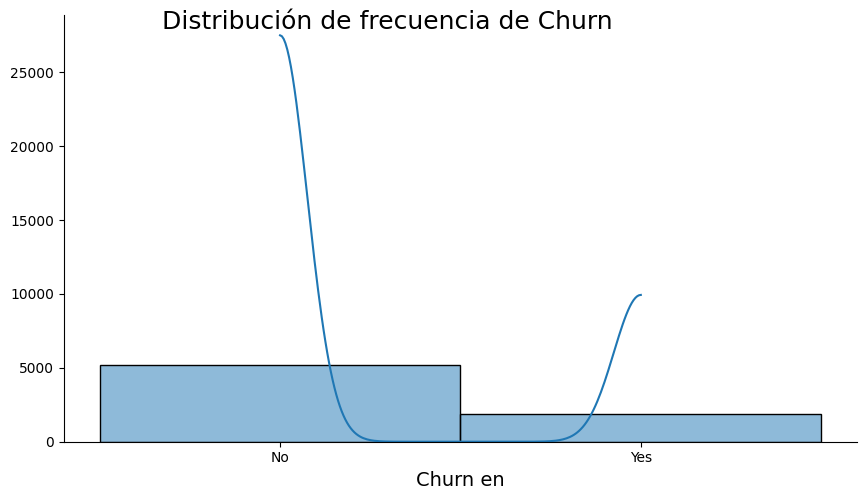

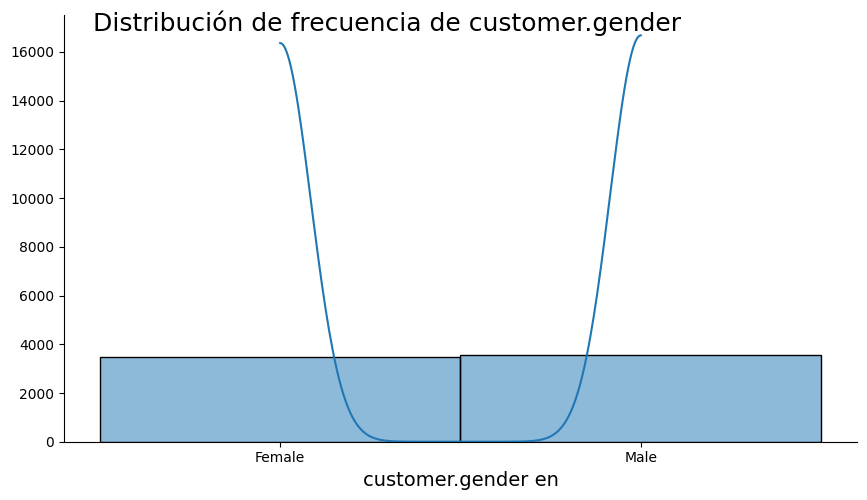

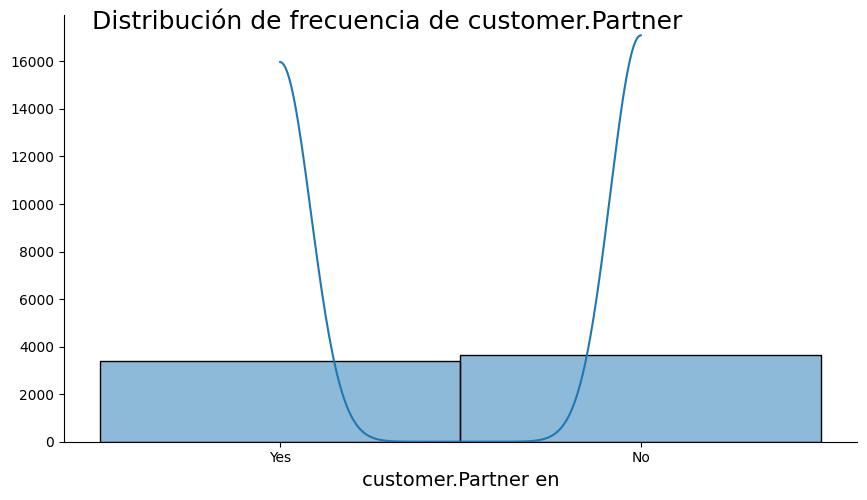

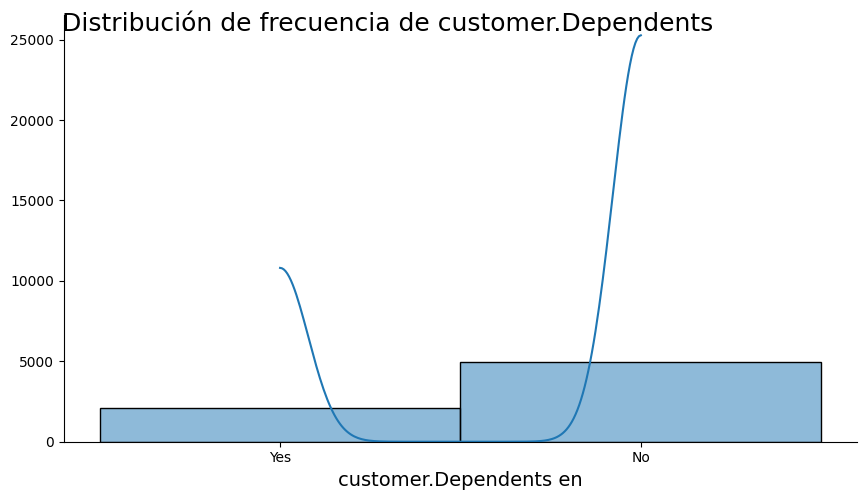

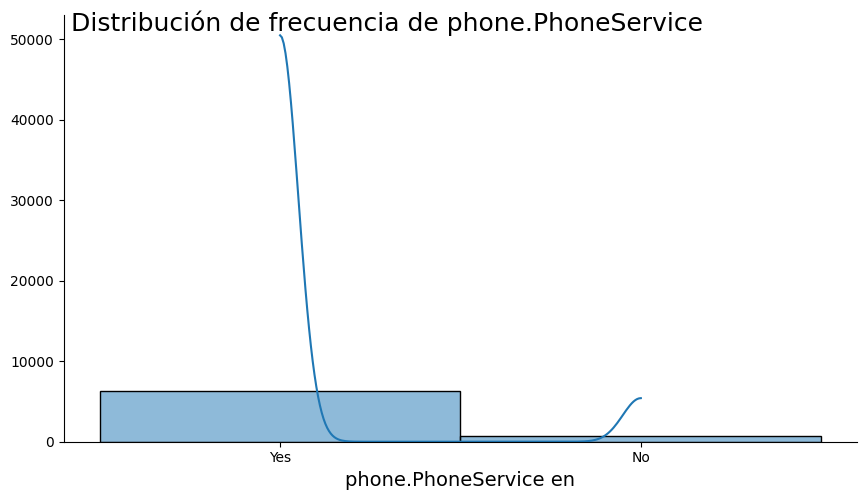

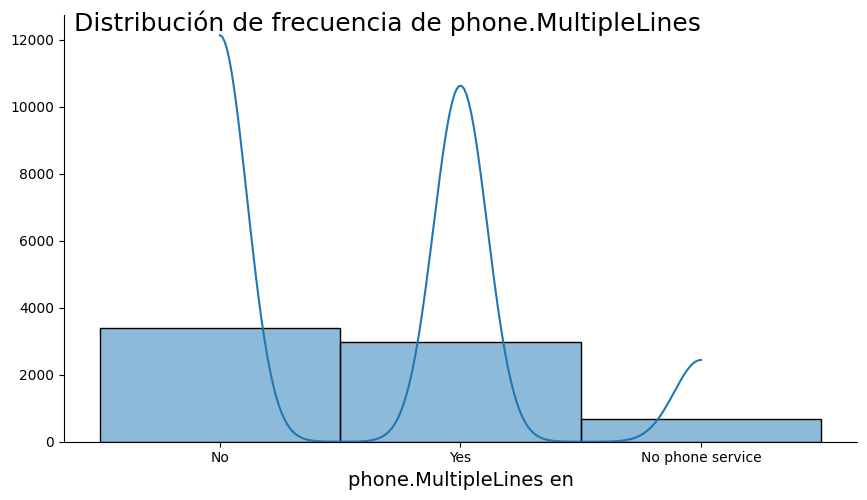

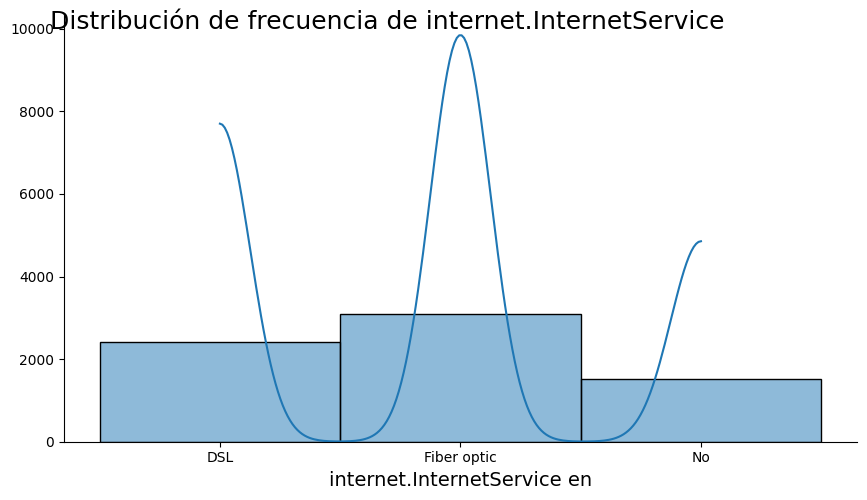

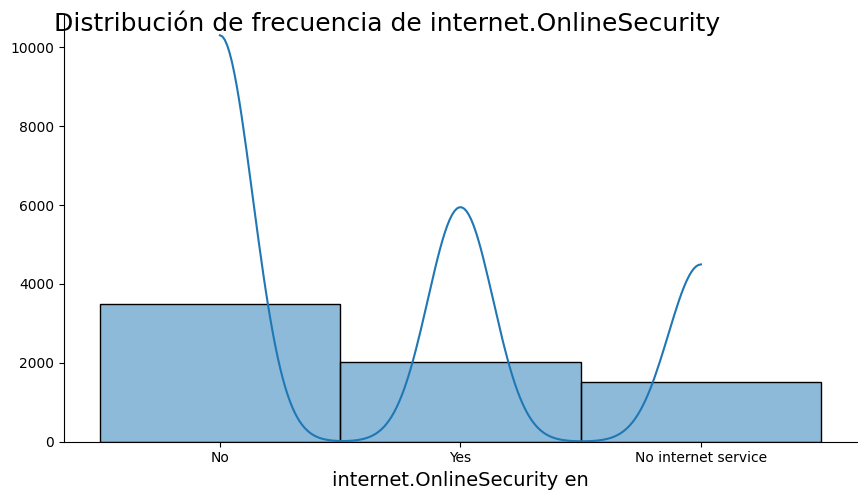

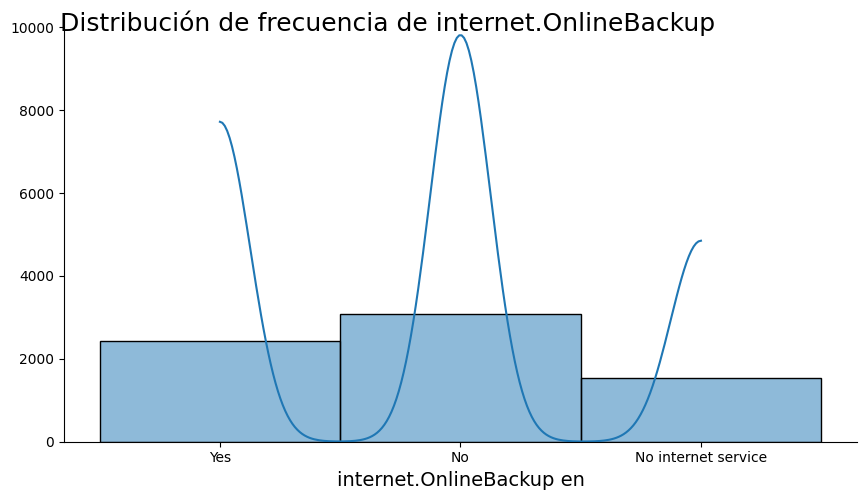

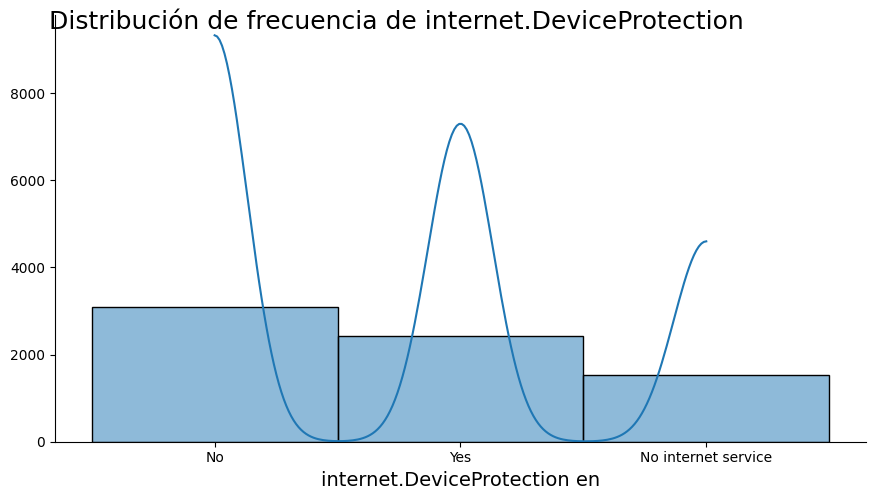

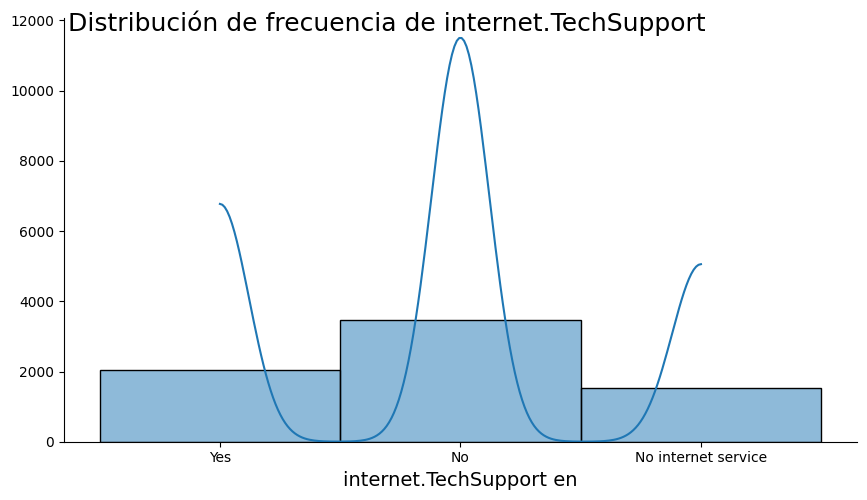

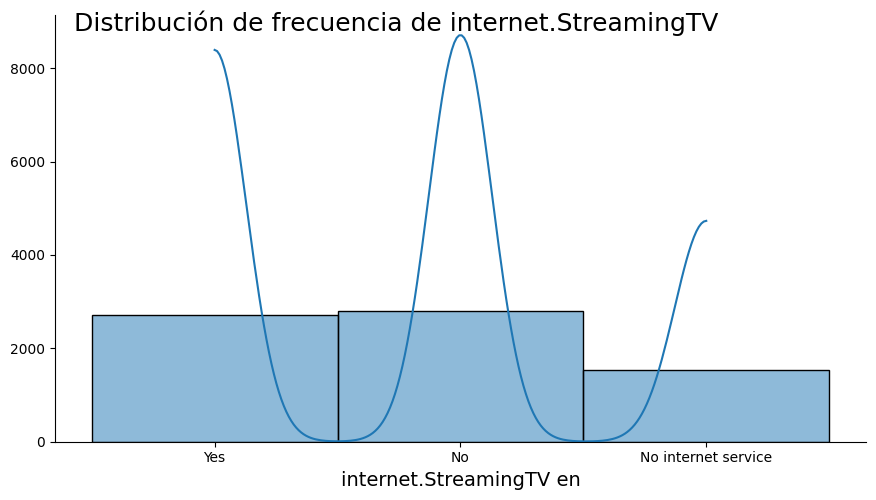

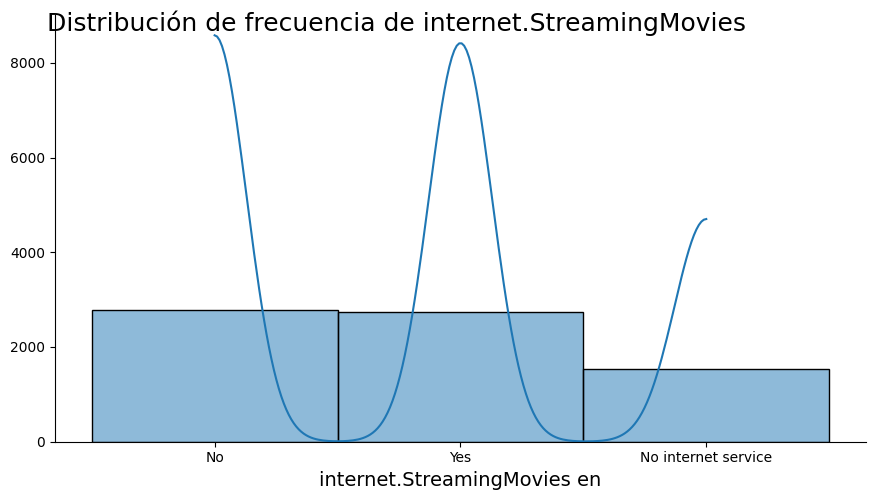

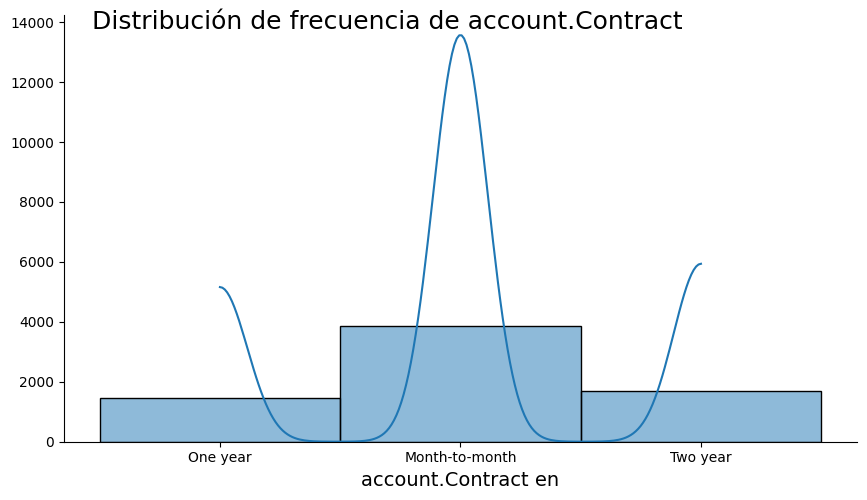

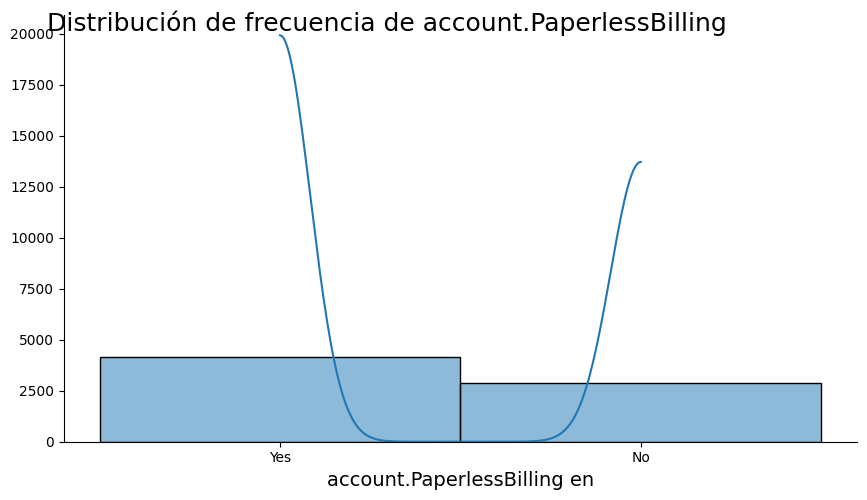

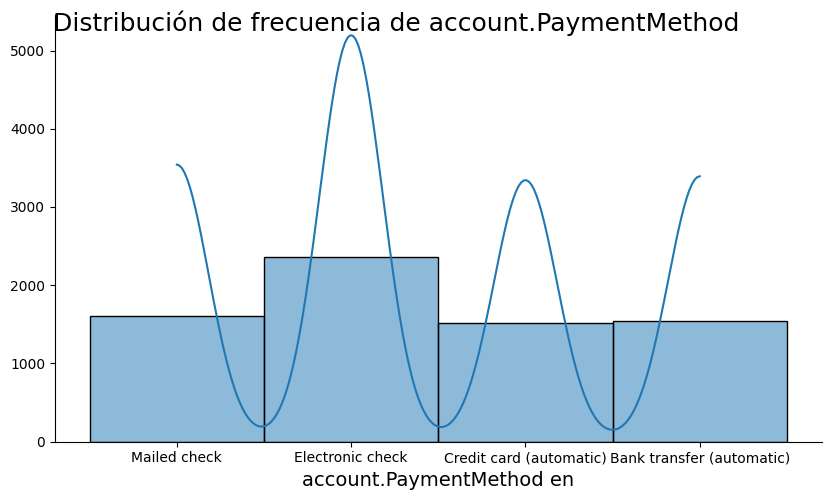

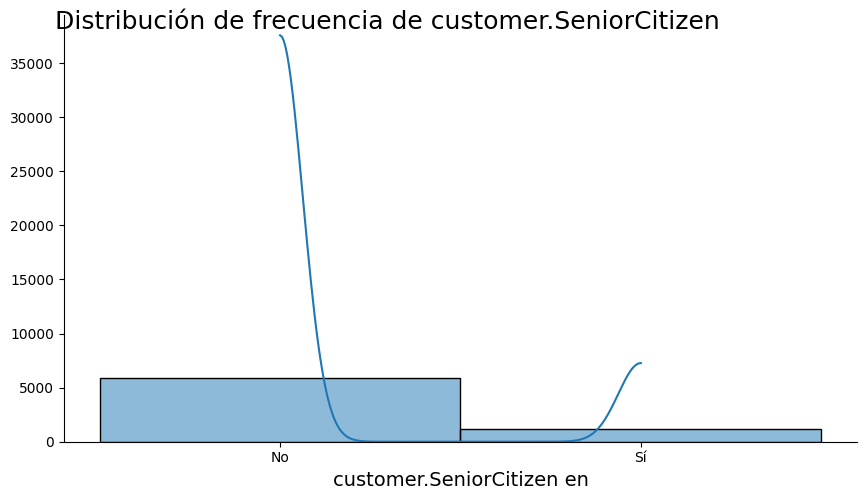

In [776]:
for col in Cualitativa:
 ax = sns.displot(data=df, x=col, kde=True)
 ax.fig.set_size_inches(10,5)
 ax.fig.suptitle(f'Distribución de frecuencia de {col}', fontsize=18)
 ax.set_xlabels(f'{col} en', fontsize=14)
 ax.set_ylabels(f'', fontsize=14)
 ax
 print(f'\n')


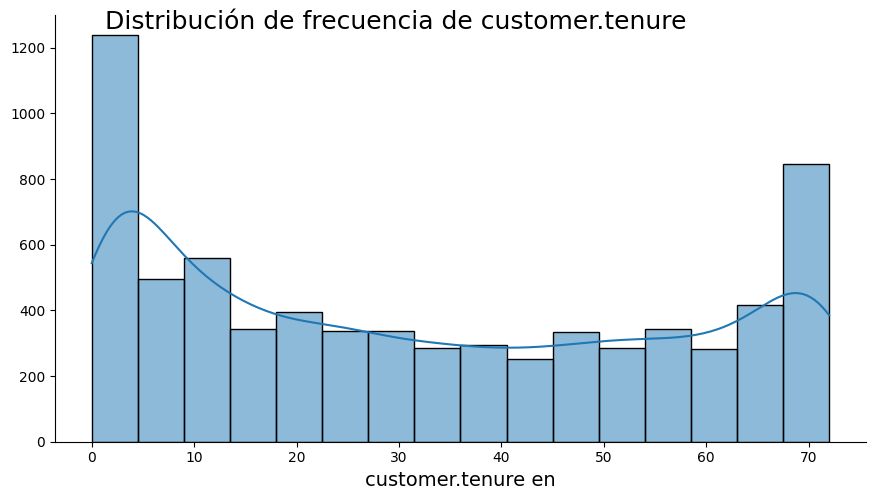

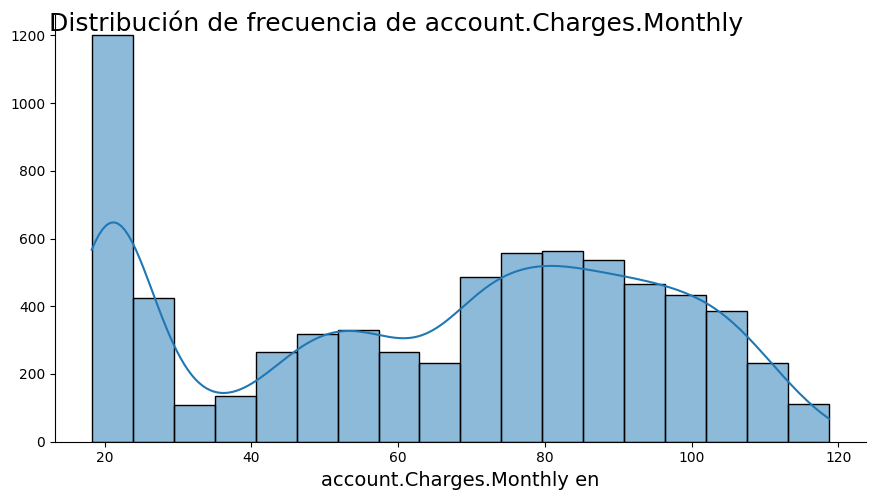

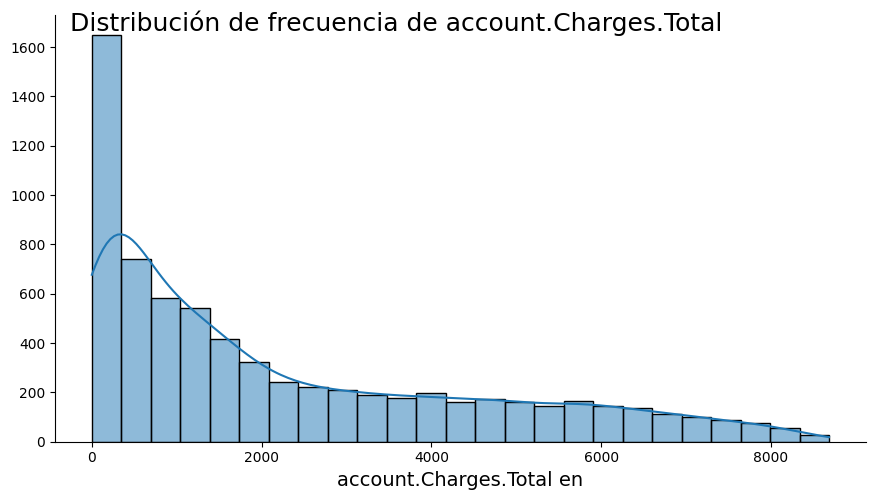

In [777]:
for col in Cuantitativa:
 ax = sns.displot(data=df, x=col, kde=True)
 ax.fig.set_size_inches(10,5)
 ax.fig.suptitle(f'Distribución de frecuencia de {col}', fontsize=18)
 ax.set_xlabels(f'{col} en', fontsize=14)
 ax.set_ylabels(f'', fontsize=14)
 ax
 print(f'\n')

### Medidas de tendencia central

In [778]:
for col_cl in Cualitativa:
  for col_ct in Cuantitativa:
    print(f'Promedio de {col_cl} contra {col_ct}\n {df.groupby([col_cl])[col_ct].mean()}\n\n')

Promedio de Churn contra customer.tenure
 Churn
No     37.569965
Yes    17.979133
Name: customer.tenure, dtype: float64


Promedio de Churn contra account.Charges.Monthly
 Churn
No     61.265124
Yes    74.441332
Name: account.Charges.Monthly, dtype: float64


Promedio de Churn contra account.Charges.Total
 Churn
No     2549.911442
Yes    1531.796094
Name: account.Charges.Total, dtype: float64


Promedio de customer.gender contra customer.tenure
 customer.gender
Female    32.244553
Male      32.495359
Name: customer.tenure, dtype: float64


Promedio de customer.gender contra account.Charges.Monthly
 customer.gender
Female    65.204243
Male      64.327482
Name: account.Charges.Monthly, dtype: float64


Promedio de customer.gender contra account.Charges.Total
 customer.gender
Female    2279.918062
Male      2279.554008
Name: account.Charges.Total, dtype: float64


Promedio de customer.Partner contra customer.tenure
 customer.Partner
No     23.357869
Yes    42.017637
Name: customer.tenure,

### one-hot encoding

In [779]:
exclude_columns = ['Churn']
columns_to_encode = [col for col in Cualitativa if col not in exclude_columns]
columns_to_encode

['customer.gender',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'customer.SeniorCitizen']

In [780]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

def preprocess_data(df, cat_columns, drop_first=True):
    df_encoded = pd.get_dummies(df, columns=cat_columns, drop_first=drop_first)
    return df_encoded

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    report = {
        'ROC AUC': roc_auc_score(y_test, y_prob),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True),
        'Model': model.__class__.__name__
    }
    return report

def churn_model_pipeline(df, target_column, cat_columns, drop_first=True, test_size=0.2, random_state=42):
    df_encoded = preprocess_data(df, cat_columns, drop_first)

    X = df_encoded.drop(columns=[target_column])
    y = df_encoded[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    models = [LogisticRegression(max_iter=1000), RandomForestClassifier()]
    results = {}

    for model in models:
        results[model.__class__.__name__] = evaluate_model(model, X_train, X_test, y_train, y_test)

    return results

In [781]:
resultados = churn_model_pipeline(df, "Churn", columns_to_encode, drop_first=True)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [782]:
for modelo, reporte in resultados.items():
    print(f"\nModelo: {modelo}")
    print(f"ROC AUC: {reporte['ROC AUC']:.3f}")
    print("Matriz de Confusión:\n", reporte['Confusion Matrix'])


Modelo: LogisticRegression
ROC AUC: 0.841
Matriz de Confusión:
 [[937  99]
 [172 201]]

Modelo: RandomForestClassifier
ROC AUC: 0.820
Matriz de Confusión:
 [[946  90]
 [196 177]]


#### Analizando con : drop_first=True


| **Métrica**                    | **LogisticRegression** | **RandomForest** | **Comentario**                                      |
|-------------------------------|-------------------------|------------------|-----------------------------------------------------|
| ROC AUC                       | 0.841                   | 0.823            | Regresión logística discrimina mejor                |
| TP (Verdaderos positivos)     | 201                     | 177              | Regresión detecta más churn reales                  |
| FP (Falsos positivos)         | 99                      | 88               | RandomForest comete menos falsos positivos          |
| FN (Falsos negativos)         | 172                     | 196              | RandomForest falla más en detectar Churn            |
| TN (Verdaderos negativos)     | 937                     | 948              | RandomForest clasifica mejor los no Churn           |

🔎 Interpretación:
- LogisticRegression tuvo mejor ROC AUC y detectó más churn reales → eso indica que las relaciones entre tus variables y el churn son suficientemente lineales.
- RandomForest no mejoró el desempeño, y de hecho tuvo más falsos negativos → no captó patrones adicionales que Logistic ya hubiera perdido.

✅ Conclusión técnica
Sí conviene usar codificación con drop_first=True, porque:

- Estás alimentando un modelo lineal (LogisticRegression)
- El modelo lineal rindió igual o mejor que el no lineal
- No necesitas todas las dummies explícitas para capturar patrones complejos


#### Analizando con : drop_first=False

In [783]:
resultados = churn_model_pipeline(df, "Churn", columns_to_encode, drop_first=False)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [784]:
for modelo, reporte in resultados.items():
    print(f"\nModelo: {modelo}")
    print(f"ROC AUC: {reporte['ROC AUC']:.3f}")
    print("Matriz de Confusión:\n", reporte['Confusion Matrix'])


Modelo: LogisticRegression
ROC AUC: 0.841
Matriz de Confusión:
 [[937  99]
 [172 201]]

Modelo: RandomForestClassifier
ROC AUC: 0.811
Matriz de Confusión:
 [[939  97]
 [204 169]]


📊 Resultados obtenidos

🔹 LogisticRegression (drop_first=False)
- ROC AUC: 0.841 (igual que con drop_first=True)
- TP: 201
- FN: 172

🔹 RandomForestClassifier (drop_first=False)
- ROC AUC: 0.816 (↓ respecto a drop_first=True)
- TP: 175 (↓)
- FN: 198 (↑)

🧠 Interpretación técnica
1. Modelo lineal no se ve afectado
- El ROC AUC no cambió al mantener todas las dummies → el modelo lineal no se benefició de tener más columnas.
- Esto indica que no hay colinealidad crítica, pero tampoco hay ganancia en precisión.
2. Modelo no lineal empeoró
- RandomForest tuvo menor ROC AUC y más falsos negativos.
- Esto sugiere que mantener todas las dummies introdujo ruido o redundancia, afectando la capacidad del modelo de generalizar.


#### ✅ Conclusión
usar drop_first=True es la opción más eficiente y robusta:

- El modelo lineal no pierde desempeño con menos dummies.
- El modelo no lineal empeora al tener todas las dummies.
- No se detectan interacciones complejas que justifiquen mantener todas las categorías explícitas.
- LogisticRegression es suficiente y más confiable en este caso

#### Encoding

In [785]:
# --- Verificar si alguna columna cualitativa es numérica
print("📌 Columnas cualitativas que en realidad son numéricas:")
for col in Cualitativa:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f" - {col} (numérica detectada)")

# --- Verificar si alguna columna cuantitativa es texto
print("\n📌 Columnas cuantitativas que en realidad NO son numéricas:")
for col in Cuantitativa:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f" - {col} (no numérica detectada)")

📌 Columnas cualitativas que en realidad son numéricas:

📌 Columnas cuantitativas que en realidad NO son numéricas:


In [786]:
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

### Verificación de la proporción de cancelacion (Churn)

In [787]:
dis_frec_cualitativa_dict['Churn']

,Frecuencia,Porcentaje %
Churn,,
No,5174,73.46
Yes,1869,26.54


La clase minoritaria (ej. Churn = Yes) representa menos del 30% del total.

Este desbalance puede afectar al modelo Logistic Regression, que tiende a favorecer la clase mayoritaria si no se corrige, se considerara aplicar técnicas de balanceo.





### Balanceo de clases

In [788]:
!pip install imbalanced-learn

Adaptaremos el flujo para que SMOTE (Balanceo de clases )esté dentro del pipeline, lo que te permitirá hacer validación cruzada reproducible, evitar data leakage, y mantener trazabilidad para auditoría.


### Normalización o Estandarización (si es necesario)

- Modelo: LogisticRegression
- ¿Requiere escalado?: Si
- ¿Por que? : Aunque es lineal, los coeficientes dependen de escala

📌 Recomendación para el flujo.

Se trabajara con pipelines que incluyen SMOTE y escalado, ya que buscamos reproducibilidad y trazabilidad, usaremos max_iter=1000 para evitar warnings y asegurar convergencia.




In [789]:
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})


In [790]:
# ✅ Preparación de datos
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

In [791]:
# Función para graficar porcentajes
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from collections import Counter

def plot_distribution(y_values, title):
    counts = Counter(y_values)
    total = sum(counts.values())
    percentages = {k: (v / total) * 100 for k, v in counts.items()}

    plt.bar(percentages.keys(), percentages.values(), color=["skyblue", "salmon"])
    plt.xticks([0, 1], ["No Churn", "Churn"])
    plt.ylabel("Porcentaje (%)")
    plt.title(title)

    # Etiquetas sobre cada barra
    for k, v in percentages.items():
        plt.text(k, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

    plt.ylim(0, 100)
    plt.show()

📌 Distribución original: Counter({0: 5174, 1: 1869})


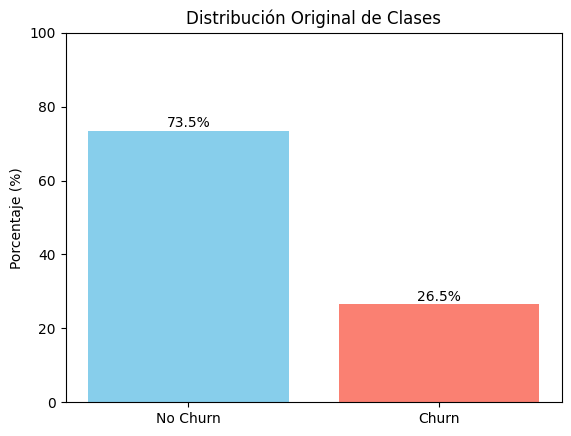

In [792]:
# 📊 Distribución original
print("📌 Distribución original:", Counter(y))
plot_distribution(y, "Distribución Original de Clases")

In [793]:
# 4️⃣ División en train/test estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

📌 Distribución después de SMOTE: Counter({0: 4139, 1: 4139})


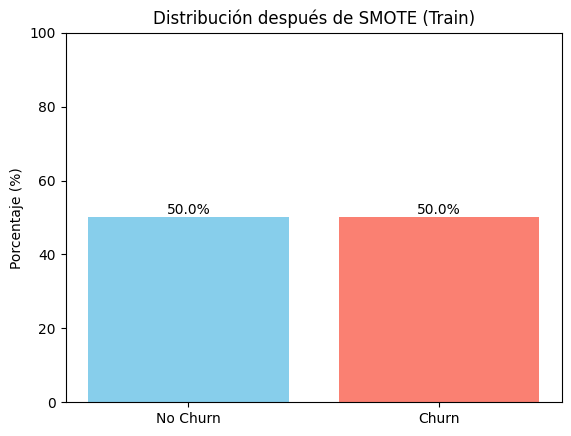

In [794]:
# 5️⃣ Aplicar SMOTE y mostrar cambio
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("📌 Distribución después de SMOTE:", Counter(y_train_res))
plot_distribution(y_train_res, "Distribución después de SMOTE (Train)")

In [795]:
# 6️⃣ Función para construir pipeline
def build_pipeline(model):
    return Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

In [796]:
# 7️⃣ Modelos
pipeline_lr = build_pipeline(LogisticRegression(max_iter=1000))
pipeline_rf = build_pipeline(RandomForestClassifier())

In [797]:
# 8️⃣ Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=cv, scoring='f1')
scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=cv, scoring='f1')

In [798]:
print(f"📊 Logistic Regression F1 scores: {scores_lr}")
print(f"📊 Random Forest F1 scores: {scores_rf}")
print(f"✅ Promedio LR: {np.mean(scores_lr)}")
print(f"✅ Promedio RF: {np.mean(scores_rf)}")

📊 Logistic Regression F1 scores: [0.59643436 0.63815789 0.59967585 0.61011419 0.60653188]
📊 Random Forest F1 scores: [0.55102041 0.6187291  0.57831325 0.5738255  0.5601318 ]
✅ Promedio LR: 0.6101828359467456
✅ Promedio RF: 0.5764040114475248


In [799]:
# 9️⃣ Entrenamiento final y evaluación
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

y_pred_lr = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

print("\n🔹 Logistic Regression Test Set Performance")
print(classification_report(y_test, y_pred_lr))
print(f"ROC AUC: {roc_auc_score(y_test, pipeline_lr.predict_proba(X_test)[:,1]):.4f}")

print("\n🔹 Random Forest Test Set Performance")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, pipeline_rf.predict_proba(X_test)[:,1]):.4f}")



🔹 Logistic Regression Test Set Performance
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.63      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409

ROC AUC: 0.8258

🔹 Random Forest Test Set Performance
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1035
           1       0.56      0.57      0.57       374

    accuracy                           0.77      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.77      0.77      0.77      1409

ROC AUC: 0.8180


In [800]:
# 🔟 (Opcional) Grid Search para optimización y ranking
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2']
}

grid_lr = GridSearchCV(
    pipeline_lr,
    param_grid_lr,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    return_train_score=True
)

grid_lr.fit(X_train, y_train)

# 📌 Mejor configuración
print("\n🏆 Mejor configuración para Logistic Regression:", grid_lr.best_params_)
print(f"Mejor F1 en validación: {grid_lr.best_score_:.4f}")

# 📊 Ranking de resultados
results_df = pd.DataFrame(grid_lr.cv_results_)
ranking = results_df[
    ["param_model__C", "param_model__penalty", "mean_test_score", "std_test_score"]
].sort_values(by="mean_test_score", ascending=False)

print("\n📊 Ranking de combinaciones probadas:")
print(ranking.to_string(index=False))


🏆 Mejor configuración para Logistic Regression: {'model__C': 0.1, 'model__penalty': 'l2'}
Mejor F1 en validación: 0.6104

📊 Ranking de combinaciones probadas:
 param_model__C param_model__penalty  mean_test_score  std_test_score
           0.10                   l2         0.610366        0.014620
           1.00                   l2         0.610183        0.014801
          10.00                   l2         0.607213        0.013851
           0.01                   l2         0.601144        0.014226


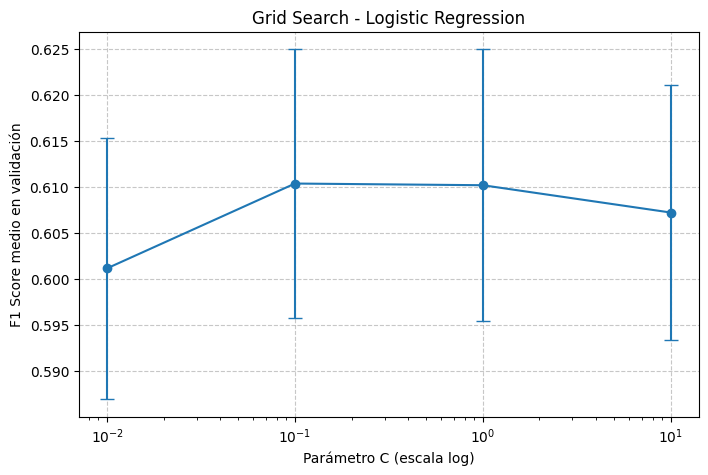

In [801]:
# Extraer resultados del GridSearch
results_df = pd.DataFrame(grid_lr.cv_results_)

# Filtrar columnas de interés
plot_df = results_df[["param_model__C", "mean_test_score", "std_test_score"]]

# Graficar
plt.figure(figsize=(8,5))
plt.errorbar(
    plot_df["param_model__C"],  # valores de C
    plot_df["mean_test_score"], # puntaje F1 medio
    yerr=plot_df["std_test_score"], # barras de error
    fmt='o-', capsize=5
)
plt.xscale("log")  # Escala logarítmica para C
plt.xlabel("Parámetro C (escala log)")
plt.ylabel("F1 Score medio en validación")
plt.title("Grid Search - Logistic Regression")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


📌 La regresión logística supera al Random Forest en este caso, lo cual sugiere que la relación entre variables podría ser más lineal de lo esperado.


# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

In [802]:
# Convertir booleanos a int
df_encoded = df_encoded.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

# Convertir a numéricas las columnas object que sean dummies (0/1 como texto)
df_encoded = df_encoded.apply(lambda col: pd.to_numeric(col, errors='ignore'))

df_encoded['Churn'] = df_encoded['Churn'].astype(int)

/tmp/ipython-input-1917193604.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_encoded = df_encoded.apply(lambda col: pd.to_numeric(col, errors='ignore'))


In [803]:
# 2️⃣ Separar variables numéricas y excluir el target
num_cols = df_encoded.select_dtypes(include=[np.number]).columns
num_cols = num_cols.drop('Churn')


In [804]:
# 3️⃣ Calcular la matriz de correlación
corr_matrix = df_encoded[num_cols.tolist() + ['Churn']].corr()


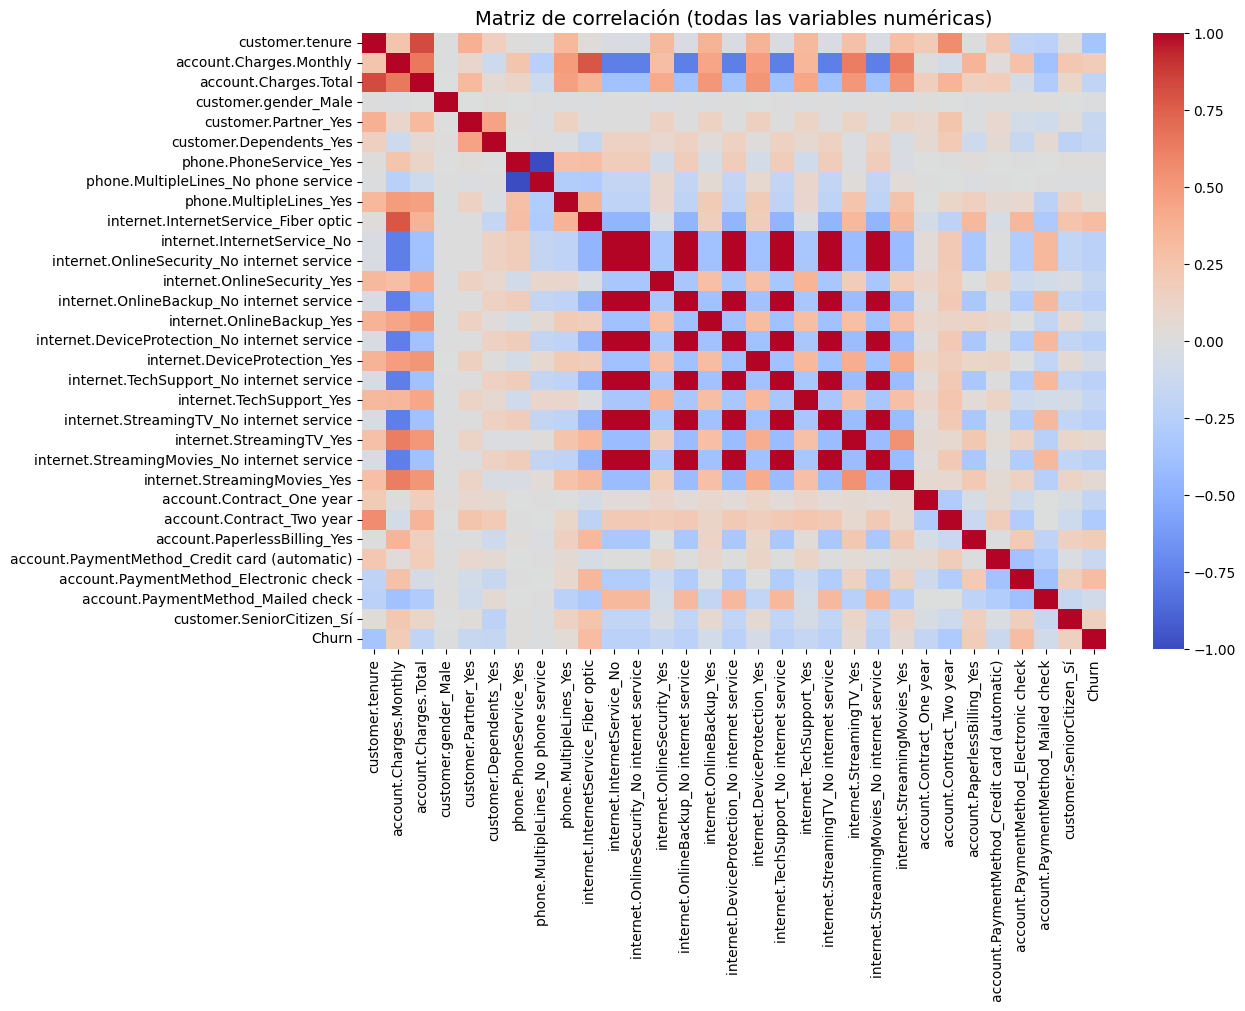

In [811]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matriz de correlación (todas las variables numéricas)", fontsize=14)
plt.show()

In [812]:
# 4️⃣ Extraer correlación con el target
churn_corr = corr_matrix['Churn'].drop('Churn')

In [742]:
# 5️⃣ Ordenar de mayor a menor correlación absoluta
#churn_corr_sorted = churn_corr.abs().sort_values(ascending=False)


In [813]:
# 6️⃣ Seleccionar las más relevantes
#top_corr_vars = churn_corr_sorted[churn_corr_sorted > 0.1]
#print(top_corr_vars)

# Correlación con Churn y ordenar por magnitud (valor absoluto)
corr_with_churn = df_encoded[num_cols].corrwith(df_encoded['Churn']).sort_values(
    key=np.abs, ascending=False
)
print(corr_with_churn.head(20))

customer.tenure                                 -0.352229
internet.InternetService_Fiber optic             0.308020
account.Contract_Two year                       -0.302253
account.PaymentMethod_Electronic check           0.301919
internet.InternetService_No                     -0.227890
internet.OnlineSecurity_No internet service     -0.227890
internet.TechSupport_No internet service        -0.227890
internet.DeviceProtection_No internet service   -0.227890
internet.StreamingTV_No internet service        -0.227890
internet.StreamingMovies_No internet service    -0.227890
internet.OnlineBackup_No internet service       -0.227890
account.Charges.Total                           -0.198324
account.Charges.Monthly                          0.193356
account.PaperlessBilling_Yes                     0.191825
account.Contract_One year                       -0.177820
internet.OnlineSecurity_Yes                     -0.171226
internet.TechSupport_Yes                        -0.164674
customer.Depen

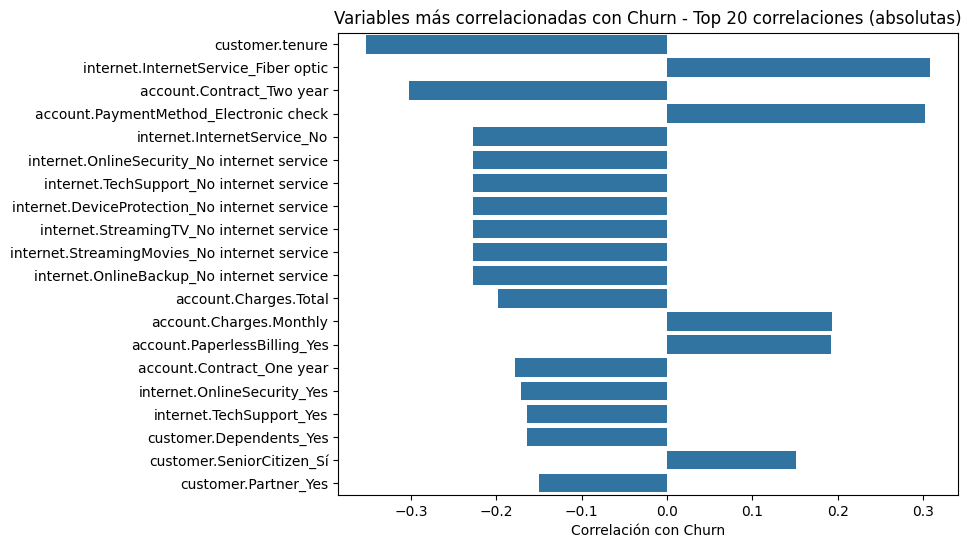

In [817]:
# 7️⃣ Visualizar
import seaborn as sns
import matplotlib.pyplot as plt

top_n = 20
vals = corr_with_churn.iloc[:top_n]

plt.figure(figsize=(8,6))
sns.barplot(x=vals .values, y=vals .index)
#plt.title('Variables más correlacionadas con Churn')
plt.xlabel('Correlación con Churn')
plt.ylabel('')
plt.title(f'Variables más correlacionadas con Churn - Top {top_n} correlaciones (absolutas)')
plt.show()


In [819]:
umbral = 0.2
variables_relevantes = churn_corr[abs(churn_corr) > umbral]
print("\n🔍 Variables con correlación significativa con Churn:")
print(variables_relevantes)


🔍 Variables con correlación significativa con Churn:
customer.tenure                                 -0.352229
internet.InternetService_Fiber optic             0.308020
internet.InternetService_No                     -0.227890
internet.OnlineSecurity_No internet service     -0.227890
internet.OnlineBackup_No internet service       -0.227890
internet.DeviceProtection_No internet service   -0.227890
internet.TechSupport_No internet service        -0.227890
internet.StreamingTV_No internet service        -0.227890
internet.StreamingMovies_No internet service    -0.227890
account.Contract_Two year                       -0.302253
account.PaymentMethod_Electronic check           0.301919
Name: Churn, dtype: float64


In [753]:
# Ahora sí, tomar todas las numéricas menos Churn
num_cols = df_encoded.select_dtypes(include=[np.number]).columns.drop('Churn')
num_cols

Index(['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total',
       'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_No internet service',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',
       'account.Contract_Two year', 'account.PaperlessBilling_Yes',
       'account.PaymentMethod_

In [754]:
# Correlación con Churn y ordenar por magnitud (valor absoluto)
corr_with_churn = df_encoded[num_cols].corrwith(df_encoded['Churn']).sort_values(
    key=np.abs, ascending=False
)

In [755]:
# Ver top 20 más correlacionadas (en valor absoluto)
print(corr_with_churn.head(20))

customer.tenure                                 -0.352229
internet.InternetService_Fiber optic             0.308020
account.Contract_Two year                       -0.302253
account.PaymentMethod_Electronic check           0.301919
internet.InternetService_No                     -0.227890
internet.OnlineSecurity_No internet service     -0.227890
internet.TechSupport_No internet service        -0.227890
internet.DeviceProtection_No internet service   -0.227890
internet.StreamingTV_No internet service        -0.227890
internet.StreamingMovies_No internet service    -0.227890
internet.OnlineBackup_No internet service       -0.227890
account.Charges.Total                           -0.198324
account.Charges.Monthly                          0.193356
account.PaperlessBilling_Yes                     0.191825
account.Contract_One year                       -0.177820
internet.OnlineSecurity_Yes                     -0.171226
internet.TechSupport_Yes                        -0.164674
customer.Depen

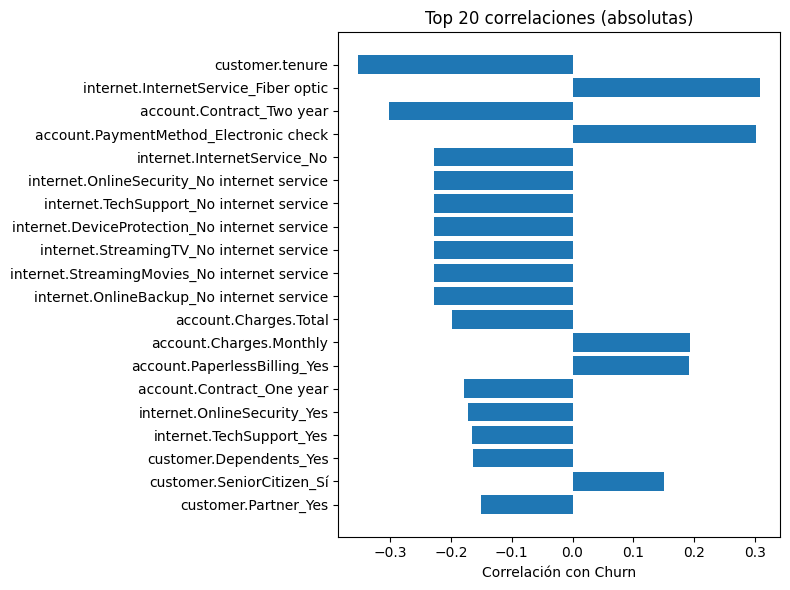

In [710]:
# Gráfico opcional
top_n = 20
vals = corr_with_churn.iloc[:top_n]
plt.figure(figsize=(8, 6))
plt.barh(range(len(vals)), vals.values)
plt.yticks(range(len(vals)), vals.index)
plt.gca().invert_yaxis()
plt.xlabel('Correlación con Churn')
plt.title(f'Top {top_n} correlaciones (absolutas)')
plt.tight_layout()
plt.show()

In [715]:
# Calculamos la correlación de todas las variables numéricas
corr_matrix = df_encoded.corr()


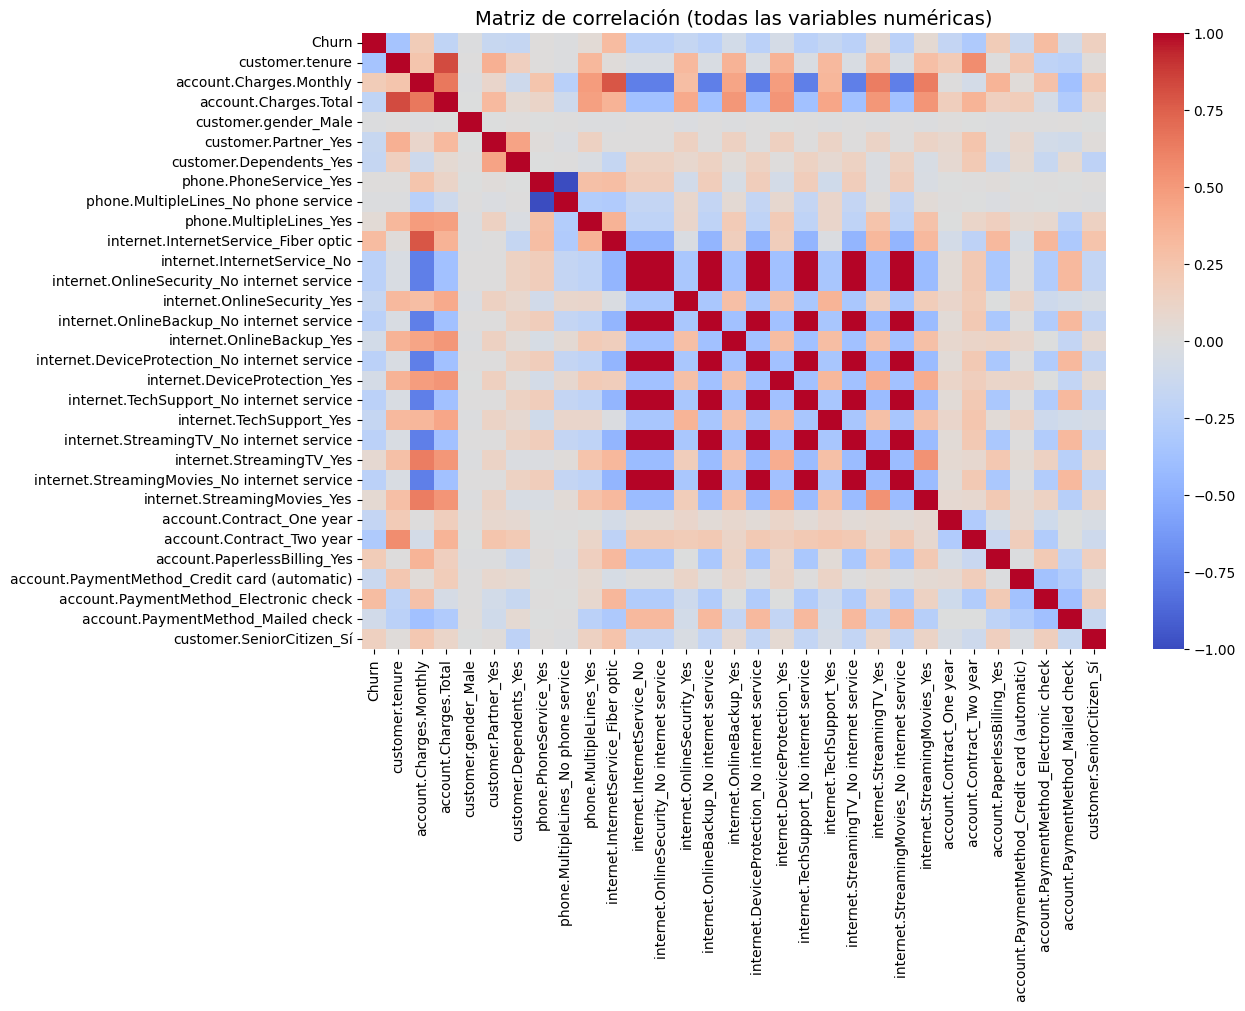

In [717]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matriz de correlación (todas las variables numéricas)", fontsize=14)
plt.show()

In [724]:
# Correlación de cada variable con Churn
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)

print("📌 Correlación de cada variable con Churn:")
print(churn_corr)

📌 Correlación de cada variable con Churn:
Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
account.PaperlessBilling_Yes                     0.191825
customer.SeniorCitizen_Sí                        0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   -0.134302
customer.Partner_Yes          

In [725]:
umbral = 0.2
variables_relevantes = churn_corr[abs(churn_corr) > umbral]
print("\n🔍 Variables con correlación significativa con Churn:")
print(variables_relevantes)


🔍 Variables con correlación significativa con Churn:
Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
internet.OnlineSecurity_No internet service     -0.227890
internet.StreamingMovies_No internet service    -0.227890
internet.OnlineBackup_No internet service       -0.227890
internet.InternetService_No                     -0.227890
internet.TechSupport_No internet service        -0.227890
internet.DeviceProtection_No internet service   -0.227890
internet.StreamingTV_No internet service        -0.227890
account.Contract_Two year                       -0.302253
customer.tenure                                 -0.352229
Name: Churn, dtype: float64


/tmp/ipython-input-3172129343.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_churn, y=corr_with_churn.index, palette="coolwarm")


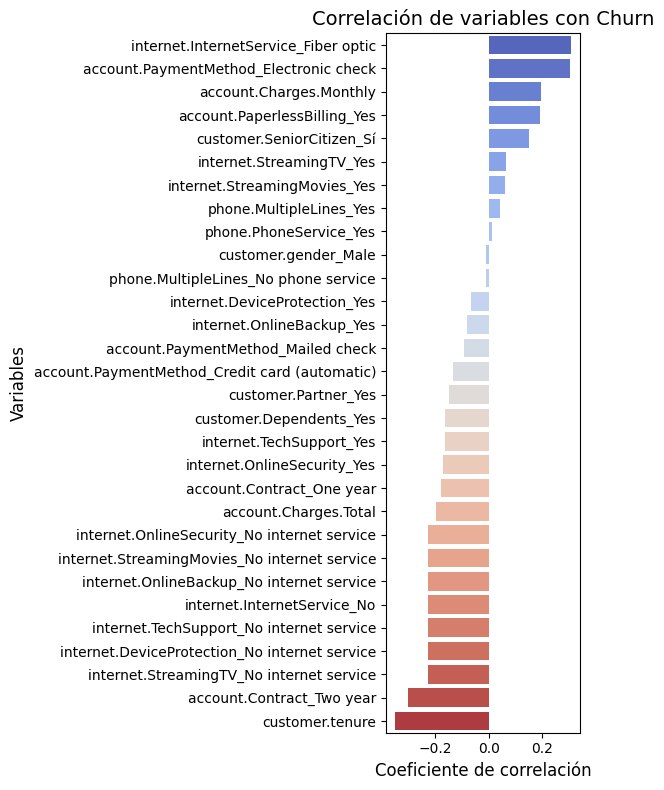

In [726]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la correlación solo con la variable "Churn"
corr_with_churn = df_encoded.corr()["Churn"].drop("Churn").sort_values(ascending=False)

# Visualización
plt.figure(figsize=(6, 8))
sns.barplot(x=corr_with_churn, y=corr_with_churn.index, palette="coolwarm")

plt.title("Correlación de variables con Churn", fontsize=14)
plt.xlabel("Coeficiente de correlación", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.tight_layout()
plt.show()


In [820]:
# Filtrar solo columnas numéricas
df_num = df_encoded.select_dtypes(include=np.number)

In [821]:
# Matriz de correlación
corr_matrix = df_num.corr()

# Ordenar por correlación con la variable objetivo 'Churn'
target_corr = corr_matrix["Churn"].sort_values(ascending=False)
print("🔍 Correlación con 'Churn':\n", target_corr)

🔍 Correlación con 'Churn':
 Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
account.PaperlessBilling_Yes                     0.191825
customer.SeniorCitizen_Sí                        0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   -0.134302
customer.Partner_Yes                        

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


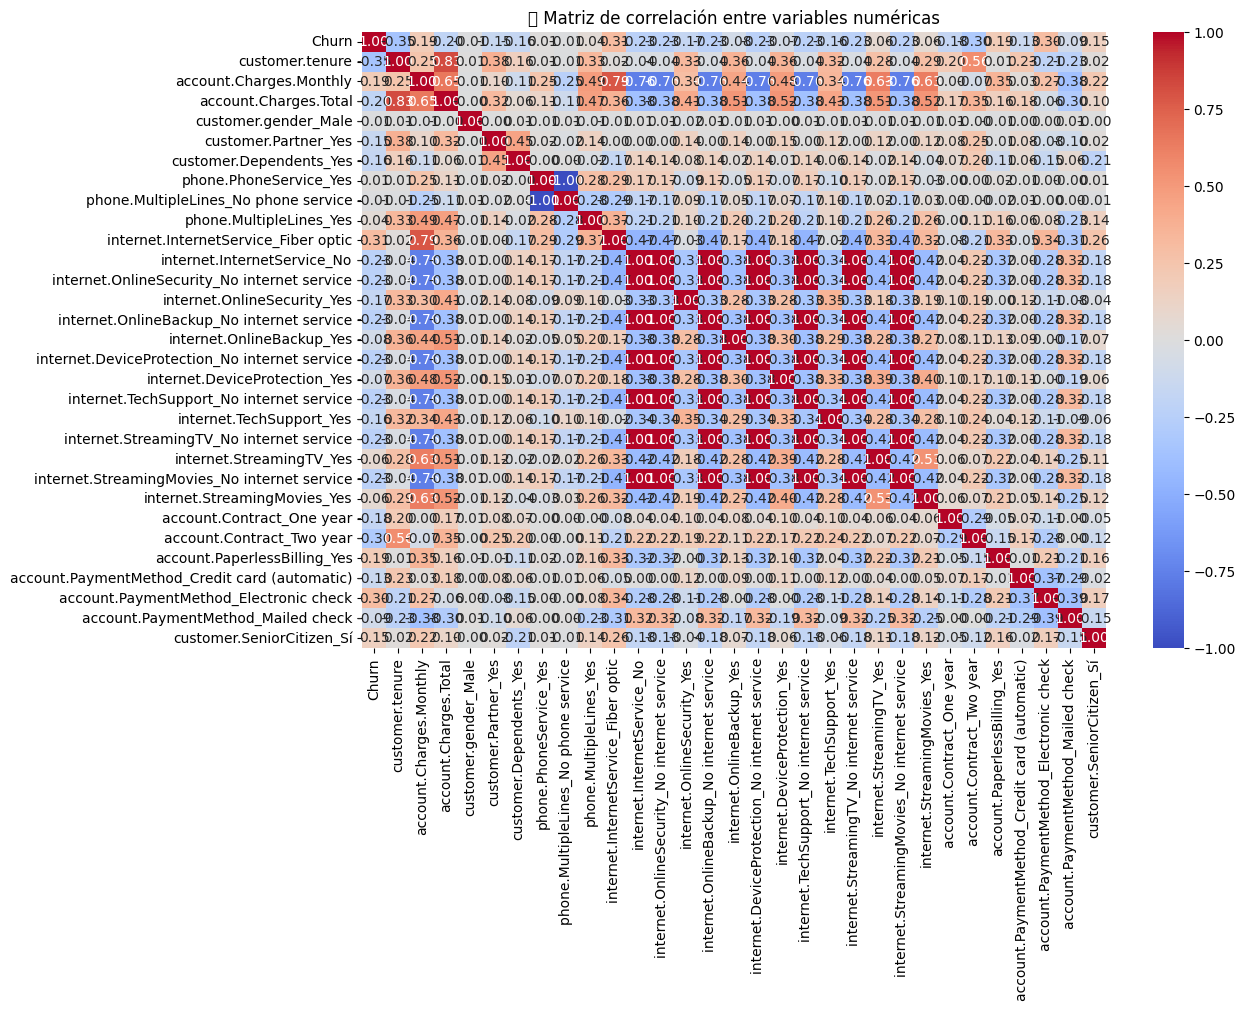

In [822]:
# Visualización con heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("🔍 Matriz de correlación entre variables numéricas")
plt.show()

/tmp/ipython-input-2050106757.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_corr['Correlación'], y=df_corr.index, palette='coolwarm')


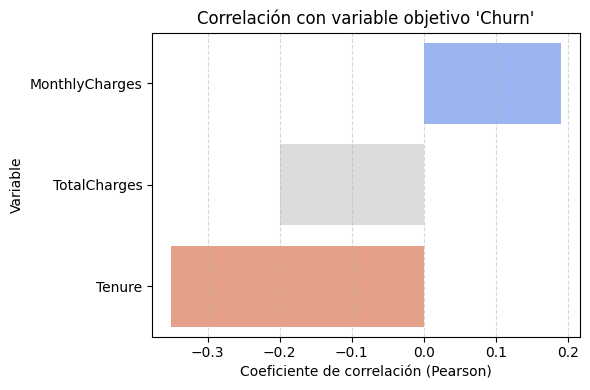

In [823]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de correlaciones
correlations = {
    'Tenure': -0.35,
    'MonthlyCharges': 0.19,
    'TotalCharges': -0.20
}

# Crear DataFrame ordenado
df_corr = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlación'])
df_corr = df_corr.sort_values(by='Correlación', ascending=False)

# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x=df_corr['Correlación'], y=df_corr.index, palette='coolwarm')
plt.title("Correlación con variable objetivo 'Churn'")
plt.xlabel("Coeficiente de correlación (Pearson)")
plt.ylabel("Variable")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

🔍 Variables más correlacionadas con 'Churn'

Se evaluó la correlación lineal entre variables numéricas y la variable objetivo `Churn`. Las siguientes variables presentan correlaciones significativas:

| Variable         | Correlación |Interpretación técnica         |
|------------------|-------------|-------------------------------|
| Tenure           | -0.35       | Clientes con más tiempo, menor probabilidad de cancelar
| MonthlyCharges   | 0.19        | Clientes con cargos mensuales más altos, tienden ligeramente a cancelar
| TotalCharges     | -0.20       | Clientes con mayor gasto acumulado, tienen menor probabilidad de cancelar

> Estas variables serán priorizadas en el modelo predictivo por su asociación lineal con la cancelación.

> ⚠️ Estas correlaciones no implican causalidad, pero justifican la inclusión de estas variables en modelos predictivos. Se recomienda evaluar sus coeficientes en modelos lineales (e.g., regresión logística) y su importancia relativa en modelos no lineales (e.g., Random Forest).

🧠 ¿Qué implica para el modelo?
- Tenure y TotalCharges tienen correlación negativa → podrían ser buenos predictores en modelos lineales como regresión logística.
- MonthlyCharges tiene correlación positiva pero débil → puede aportar algo de señal, pero no es determinante por sí sola.
- Estas correlaciones no implican causalidad, pero sí justifican incluir estas variables en el modelo y evaluar su coeficiente


## Análisis Dirigido

In [ ]:
y_Label = {"customer.tenure": "meses","account.Charges.Monthly": "USD","account.Charges.Total": "USD"}

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in Cuantitativa:
 plt.figure(figsize=(8, 5))
 sns.boxplot(x='Churn', y=col, data=df_encoded)
 plt.title(f'Distribución de {col} según Churn')
 plt.xlabel('Churn')
 plt.ylabel(f'{col} {y_Label[col]}')
 plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col_x in Cuantitativa:
    Cuantitativa_t = Cuantitativa[:]
    Cuantitativa_t.remove(col_x)
    for col_y in Cuantitativa_t:
      plt.figure(figsize=(8, 6))
      sns.scatterplot(
          data=df_encoded,
          x=col_x,
          y=col_y,
          hue='Churn',
          palette='Set1',
          alpha=0.6
      )
      plt.title(f'{col_x} vs {col_y} según Churn')
      plt.xlabel(f'{col_x} ({y_Label[col_x]})')
      plt.ylabel(f'{col_y} ({y_Label[col_y]})')
      plt.legend(title='Churn')
      plt.grid(True, linestyle='--', alpha=0.5)
      plt.tight_layout()
      plt.show()
      plt.close()
      #break
    #break

🔹 customer.tenure vs account.Charges.Monthly
- Los clientes que **no cancelan** se distribuyen en todo el **rango de antigüedad y gastos mensuales más bajos**, alta concentración en zonas de alta antigüedad y gastos mensuales bajos sugiere fidelización en clientes con cargos moderados.

- Los clientes que **cancelan** se concentran en regiones de **baja antigüedad y gastos mensuales altos**, lo que indica cancelaciones tempranas en clientes con cargos elevados, posiblemente por percepción de alto costo.

> Esta interacción sugiere que account.Charges.Monthly es un factor de riesgo importante para cancelación temprana, y su combinación con customer.tenure puede aportar valor predictivo en modelos no lineales.

🔹 customer.tenure  vs account.Charges.Total
- Los clientes que **no cancelan** tienden a agruparse en zonas de **alta antigüedad y alto gasto acumulado**, lo que sugiere fidelización en clientes con altos gastos acumulados.

- Los clientes que **cancelan** se concentran en regiones de **baja antigüedad y bajo gasto acumulado**, Lo que sugiere cancelaciones tempranas, posiblemente por insatisfacción desde el inicio.

> Esta interacción sugiere que account.Charges.Total es un factor de riesgo importante para cancelación temprana, y su combinación con customer.tenure puede aportar valor predictivo en modelos no lineales.

🔹 account.Charges.Monthly vs account.Charges.Total
- Los clientes que **no cancelan** presentan **mayor dispersión en el gasto acumulado**, lo que indica mayor permanencia y acumulación de gasto.
- Se observa que clientes con **cargos mensuales altos pero bajo gasto acumulado** tienden a **cancelar**, posiblemente por insatisfacción temprana.

> Estas visualizaciones respaldan la inclusión de `Tenure`, `MonthlyCharges` y `TotalCharges` como variables relevantes en el modelo de churn y permiten identificar patrones de comportamiento que pueden ser útiles para estrategias de retención.



# 🤖 Modelado Predictivo

## Separación de datos

In [ ]:
# 📦 Importación de librerías necesarias
from sklearn.model_selection import train_test_split

In [ ]:
# 🎯 Variables predictoras y objetivo
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

In [ ]:
# ⚙️ División reproducible 80/20 con semilla fija para trazabilidad
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,         # ← cambia a 0.30 si prefieres 70/30
    random_state=42,        # ← semilla fija para reproducibilidad
    stratify=y              # ← mantiene proporción de clases en ambos sets
)

In [ ]:
# 📊 Verificación de tamaños
print(f"🔹 Tamaño total: {len(df)} registros")
print(f"🔹 Entrenamiento: {len(X_train)} registros")
print(f"🔹 Prueba: {len(X_test)} registros")
print(f"🔹 Proporción de clases en entrenamiento:\n{y_train.value_counts(normalize=True)}")
print(f"🔹 Proporción de clases en prueba:\n{y_test.value_counts(normalize=True)}")

## Creación de Modelos

### ⚙️ Modelo 1: Regresión Logística (requiere normalización)

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),                  # 🔹 Normalización
    ('model', LogisticRegression(max_iter=1000))   # 🔹 Modelo lineal
])

In [ ]:
pipeline_lr

✅ Justificación técnica

• 	La regresión logística optimiza una función basada en gradientes.

• 	Si las variables tienen escalas muy distintas, los coeficientes pueden estar sesgados.

• 	La normalización asegura que cada variable tenga media 0 y desviación estándar 1, lo que mejora la convergencia y la interpretabilidad.

### ⚙️ Modelo 2: Random Forest (no requiere normalización)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)

In [ ]:
model_rf

✅ Justificación técnica

• 	Los árboles de decisión y Random Forest dividen el espacio de características según umbrales, no distancias ni coeficientes.

• 	Por eso, no necesitan normalización: cada variable se evalúa por separado.

• 	Esto permite usar el modelo directamente sobre los datos originales.

### Evaluación de los Modelos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    print(f"\n🔍 Evaluación: {nombre}")
    print("Exactitud (Accuracy):\t", accuracy_score(y_test, y_pred))
    print("Precisión:\t\t", precision_score(y_test, y_pred))
    print("Recall:\t\t\t", recall_score(y_test, y_pred))
    print("F1-score:\t\t", f1_score(y_test, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))


In [ ]:
# Train the Logistic Regression pipeline
pipeline_lr.fit(X_train, y_train)

# Train the Random Forest model
model_rf.fit(X_train, y_train)

# Evaluar ambos modelos
evaluar_modelo("Regresión Logística", pipeline_lr, X_test, y_test)
evaluar_modelo("Random Forest", model_rf, X_test, y_test)

🧠 Análisis Crítico

🔹 Regresión Logística
- Mejor desempeño global en todas las métricas.
- Mayor precisión y recall, lo que indica mejor balance entre falsos positivos y falsos negativos.
- Menor cantidad de falsos negativos (FN = 179) que Random Forest (FN = 204), lo cual es crucial si el costo de no detectar cancelaciones es alto.
- Posible underfitting leve: como modelo lineal, puede no capturar interacciones complejas, pero su desempeño es sólido.

🔹 Random Forest
- Peor recall: detecta menos cancelaciones reales.
- Más falsos negativos (FN = 204) → riesgo de no identificar clientes que se van.
- Ligero overfitting posible: aunque es un modelo más complejo, no generaliza mejor en este caso.
- Puede estar capturando ruido o relaciones espurias si no se ha limitado la profundidad (max_depth) o el número mínimo de muestras por hoja (min_samples_leaf).


### 📊 Comparación de Modelos: Churn Prediction

#### 🔹 Regresión Logística
- **Accuracy**: 0.793
- **Precisión**: 0.633
- **Recall**: 0.521
- **F1-score**: 0.572
- **Confusión**: [[922, 113], [179, 195]]
- **Diagnóstico**: Leve *underfitting*, pero buen balance general.

#### 🔹 Random Forest
- **Accuracy**: 0.781
- **Precisión**: 0.618
- **Recall**: 0.455
- **F1-score**: 0.524
- **Confusión**: [[930, 105], [204, 170]]
- **Diagnóstico**: Posible *overfitting*, con peor recall.

#### 🧠 Conclusión
- **Modelo recomendado**: Regresión Logística.
- **Siguiente paso**: Ajustar hiperparámetros, calibrar probabilidades y evaluar con validación cruzada.

🔍 Diagnóstico de Overfitting / Underfitting

| Modelo | Diagnóstico | Evidencia técnica | Ajustes recomendados |
|--------|-------------|-------------------|----------------------|
| Regresión Logística | Leve underfitting | Recall moderado, modelo lineal | Agregar variables polinomiales o usar SVM |
| Random Forest | Posible overfitting | Peor recall, más FN, sin mejora en accuracy | Regularización: max_depth, min_samples_leaf, n_estimators |






🧠 Recomendación
- Modelo preferido: Regresión Logística, por su mejor balance entre precisión y recall.
- Siguiente paso: calibrar probabilidades, ajustar hiperparámetros y considerar un modelo híbrido (por ejemplo, stacking con ambos modelos).
- Validación cruzada: recomendable para confirmar si el desempeño se mantiene en otras particiones.


# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

###  🔍 1. Regresión Logística: análisis de coeficiente

In [ ]:
import pandas as pd

# Extraer coeficientes
feature_names = X.columns
coeficientes = pipeline_lr.named_steps['model'].coef_[0]

# Crear DataFrame ordenado
df_coef = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', ascending=False)

print(df_coef)

📌 Interpretación

• 	Coeficientes positivos → aumentan la probabilidad de churn.

• 	Coeficientes negativos → reducen la probabilidad de churn.

• 	Magnitud → indica fuerza del efecto (aunque no comparables si no están normalizados).

📊 Análisis de coeficientes en Regresión Logística

🔺 Variables que aumentan la probabilidad de cancelación (coef > 0)

Estas variables están asociadas positivamente con el churn. Es decir, si están presentes o sus valores aumentan, la probabilidad de cancelación también lo hace:

| Variable | Coeficiente | Interpretación |
|----------|-------------|----------------|
| account.Charges.Total | 0.676 | Clientes con cargos acumulados altos tienden a cancelar. |
| internet.InternetService_Fiber optic | 0.551 | El servicio de fibra óptica está correlacionado con mayor churn. |
| account.PaymentMethod_Electronic check | 0.190 | Este método de pago se asocia con mayor cancelación. |
| phone.MultipleLines_Yes | 0.189 | Tener múltiples líneas telefónicas puede estar ligado a mayor insatisfacción. |
| internet.StreamingTV_Yes | 0.187 | Usuarios con TV en streaming tienden a cancelar más. |
| account.PaperlessBilling_Yes | 0.179 | Facturación sin papel se asocia con mayor churn. |





🔻 Variables que reducen la probabilidad de cancelación (coef < 0)

Estas variables están asociadas negativamente con el churn. Su presencia o aumento reduce la probabilidad de cancelación:

| Variable | Coeficiente | Interpretación |
|----------|-------------|----------------|
|customer.tenure| -1.408 |Clientes con más tiempo de permanencia son menos propensos a cancelar.|
|account.Contract_Two year | -0.578 | Contratos de dos años retienen mejor a los clientes. |
| account.Charges.Monthly | -0.480 | Curiosamente, cargos mensuales más altos se asocian con menor churn (posible correlación con servicios premium). |
| account.Contract_One year | -0.279 | También reduce el churn, aunque menos que el contrato de dos años. |
| internet.TechSupport_Yes | -0.161 | Tener soporte técnico reduce la cancelación. |
| internet.OnlineSecurity_Yes | -0.118 | Seguridad en línea también retiene clientes. |


🧠 Observaciones clave

• 	Tenure es la variable más protectora contra el churn. Su coeficiente negativo es el más fuerte.

• 	Los contratos largos (especialmente de dos años) son un fuerte factor de retención.

• 	El uso de servicios adicionales como soporte técnico y seguridad en línea también reduce la cancelación.

• 	Por otro lado, servicios de entretenimiento como streaming y fibra óptica están correlacionados con mayor churn, posiblemente por expectativas altas o competencia.


📈 Importancia de variables en Regresión Logística

Se analizaron los coeficientes del modelo para identificar las variables que más influyen en la probabilidad de cancelación (`Churn`).

🔺 Variables que aumentan el churn
- `account.Charges.Total` (+0.676): cargos acumulados altos → mayor cancelación.
- `internet.InternetService_Fiber optic` (+0.551): fibra óptica → mayor churn.
- `account.PaymentMethod_Electronic check` (+0.190): método de pago asociado a cancelación.

🔻 Variables que reducen el churn
- `customer.tenure` (−1.408): mayor permanencia → menor cancelación.
- `account.Contract_Two year` (−0.578): contratos largos → retención.
- `internet.TechSupport_Yes` (−0.161): soporte técnico → fidelización.

> Este análisis permite priorizar variables en estrategias de retención y justificar decisiones ante auditoría técnica.

### 🔍 2. Random Forest: importancia de variable

In [ ]:
importances = model_rf.feature_importances_

df_importancia_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(df_importancia_rf)

📌 Interpretación
- Basado en reducción de impureza (Gini).
- Variables con mayor importancia son las que más contribuyen a las decisiones en los árboles.
- No requiere normalización.


📊 Top variables más importantes

| Variable | Importancia | Interpretación técnica |
|----------|-------------|------------------------|
| account.Charges.Total | 0.194 | Gasto acumulado: fuerte predictor de comportamiento. |
| customer.tenure | 0.175 | Antigüedad del cliente: cuanto más tiempo, menor churn. |
| account.Charges.Monthly | 0.167 | Cargos mensuales: nivel de gasto recurrente. |

Estas tres variables dominan el modelo, representando más del 53% de la importancia total, lo que indica que el modelo se apoya fuertemente en gasto y permanencia.



🔍 Variables de importancia media

| Variable | Importancia | Observación |
|----------|-------------|-------------|
| account.PaymentMethod_Electronic check | 0.041 | Método de pago asociado a mayor churn. |
| internet.InternetService_Fiber optic | 0.035 | Servicio de alta velocidad, posiblemente asociado a expectativas altas. |
| customer.gender_Male | 0.028 | Ligera influencia, posiblemente indirecta. |
| account.PaperlessBilling_Yes | 0.026 | Facturación digital, correlación con perfil digital. |
| internet.OnlineSecurity_Yes | 0.025 | Seguridad en línea como factor protector. |
| account.Contract_Two year | 0.025 | Contratos largos reducen el churn. |






🔻 Variables de baja importancia (< 0.02)
Estas variables tienen impacto marginal en el modelo:
- Servicios específicos (StreamingTV, StreamingMovies, DeviceProtection, etc.)
- Métodos de pago alternativos (Credit card, Mailed check)
- Indicadores de servicio no disponible (No internet service, etc.)

Esto sugiere que el modelo no se apoya fuertemente en servicios individuales, sino en patrones de gasto y permanencia.


🧠 Comparación con Regresión Logística

| Variable | RF Importancia | RL Coeficiente | Coincidencia |
|----------|----------------|----------------|--------------|
| customer.tenure | 0.175 | −1.408 | ✅ Alta, ambos modelos lo consideran muy relevante|
| account.Charges.Total | 0.194 | +0.677 | ✅ Alta, ambos modelos lo consideran clave|
| account.Contract_Two year | 0.025 | −0.578 | ✅ Alta |
| MonthlyCharges | 0.167 | −0.480 | ⚠️ Inverso |


Aunque MonthlyCharges tiene alta importancia en RF, su coeficiente en RL es negativo. Esto puede deberse a interacciones no lineales que RF captura y RL no.





🌲 Importancia de variables en Random Forest

Se analizó la importancia de cada variable en el modelo Random Forest, basada en la reducción de impureza (Gini).

🔝 Variables más relevantes
- `account.Charges.Total` (0.194): gasto acumulado → fuerte predictor de churn.
- `customer.tenure` (0.175): antigüedad → retención.
- `account.Charges.Monthly` (0.167): nivel de gasto mensual → impacto significativo.

🔹 Variables de importancia media
- `account.PaymentMethod_Electronic check` (0.041): método de pago asociado a mayor churn.
- `internet.InternetService_Fiber optic` (0.035): servicio de alta velocidad → posible insatisfacción.
- `account.Contract_Two year` (0.025): contratos largos → menor churn.

🔻 Variables de baja importancia
- Servicios específicos (`Streaming`, `DeviceProtection`) y métodos de pago alternativos tienen impacto marginal.

> El modelo Random Forest se apoya principalmente en variables de gasto y permanencia, lo que coincide con el análisis de regresión logística. Se recomienda priorizar estas variables en estrategias de retención y en modelos explicativos.

Comparación de importancia entre Random Forest y Regresión Logística

Aunque los valores numéricos no coinciden, se considera “coincidencia alta” cuando ambos modelos identifican una variable como relevante para predecir churn.

- `customer.tenure`: RF la usa frecuentemente en splits (0.175), RL indica que reduce churn (−1.408).
- `account.Charges.Total`: RF la considera la más importante (0.194), RL indica que aumenta churn (+0.677).
- `account.Contract_Two year`: RF le asigna importancia media (0.025), RL indica efecto protector (−0.578).

> Esta coincidencia refuerza la validez empírica de estas variables como predictoras clave, desde enfoques complementarios.

🎯 Variable: `account.Contract_Two year`

- **Tipo**: Binaria (1 si el cliente tiene contrato de dos años, 0 en caso contrario)
- **Importancia en Random Forest**: 0.025 → importancia media
- **Coeficiente en Regresión Logística**: −0.578 → efecto protector

🔍 Interpretación técnica

El coeficiente negativo en regresión logística indica que tener un contrato de dos años **reduce la probabilidad de churn**. El cálculo del odds ratio lo confirma:

- `OR = exp(−0.578) ≈ 0.561`
- Esto implica que los clientes con contrato de dos años tienen **un 43.9% menos de probabilidades de cancelar** respecto a los demás.

✅ Validación cruzada entre modelos

Aunque su importancia en Random Forest es moderada, ambos modelos coinciden en que esta variable tiene un **efecto protector**. Esto refuerza su valor estratégico como **factor de retención contractual**.

> Recomendación: incluir esta variable en el modelo final y considerar su uso en estrategias de fidelización.

### 🔍 3. KNN: impacto indirecto por escala y distancia

KNN no tiene coeficientes ni importancia directa, pero puedes evaluar qué variables afectan más la distancia entre puntos:

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular varianza por dimensión (mayor varianza → más impacto en distancia)
impacto_knn = pd.DataFrame({
    'Variable': X.columns,
    'Varianza (normalizada)': np.var(X_scaled, axis=0)
}).sort_values(by='Varianza (normalizada)', ascending=False)

print(impacto_knn)

📊 Análisis de varianza normalizada en KNN

Todas las variables han sido escaladas para tener **varianza unitaria (1.0)**, lo cual es esencial en modelos basados en distancia como KNN. Esto asegura que ninguna variable domine el cálculo de proximidad por su escala original.

🔍 Variables incluidas

- **Servicios contratados**: `TechSupport_Yes`, `StreamingTV_Yes`, `PhoneService_Yes`
- **Datos demográficos**: `SeniorCitizen_Sí`, `gender_Male`, `Partner_Yes`, `Dependents_Yes`
- **Métodos de pago**: `Electronic check`, `Credit card (automatic)`
- **Contratos y facturación**: `Contract_Two year`, `Charges.Monthly`, `PaperlessBilling_Yes`
- **Estado de internet**: `InternetService_No`, `OnlineSecurity_Yes`, `No internet service`

⚠️ Nota técnica

La varianza normalizada no implica igualdad de importancia, sino **igualdad de escala**. Para evaluar impacto real, se recomienda análisis de sensibilidad local o validación cruzada con métricas de clasificación.

> Recomendación: mantener esta normalización en el pipeline de KNN y complementar con análisis empírico de vecinos cercanos.

### 🔍 4. SVM: coeficientes del hiperplan

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train, y_train)

df_svm = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': svm_model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print(df_svm)

📌 Interpretación

• 	Variables con coeficientes grandes influyen más en la frontera de decisión.

• 	Signo indica dirección del efecto.

⚖️ Análisis de coeficientes en SVM lineal

El modelo SVM lineal asigna pesos a cada variable según su influencia en la clasificación de churn. Los coeficientes positivos indican mayor riesgo de cancelación, mientras que los negativos representan factores protectores.

🔺 Variables que aumentan el riesgo de churn

- `internet.InternetService_Fiber optic` (+0.236): posible insatisfacción o competencia en clientes con fibra.
- `account.PaperlessBilling_Yes` (+0.138): correlación con clientes digitales menos comprometidos.
- `PaymentMethod_Electronic check` (+0.122): método históricamente asociado a mayor churn.
- `phone.MultipleLines_Yes` (+0.118): clientes con múltiples líneas podrían ser más exigentes.

🔻 Variables con efecto protector

- `account.Contract_One year` (−0.170) y `Contract_Two year` (−0.140): contratos largos retienen clientes.
- `internet.TechSupport_Yes` (−0.203): soporte técnico como valor agregado.
- `internet.OnlineSecurity_Yes` (−0.158): percepción de seguridad reduce cancelaciones.
- `phone.PhoneService_Yes` (−0.161): servicio completo como factor de fidelización.

> Recomendación: priorizar variables con coeficientes negativos en estrategias de retención y justificar su inclusión en el modelo final por su efecto protector.

### 📊 Análisis de importancia de variables por modelo

#### 🔹 Regresión Logística
- Se analizaron los coeficientes del modelo.
- Variables con coeficientes positivos aumentan la probabilidad de cancelación.
- Variables destacadas: `MonthlyCharges`, `Contract_Two year`, `Tenure`.

#### 🔹 Random Forest
- Se utilizó la importancia basada en reducción de impureza.
- Variables más relevantes: `Tenure`, `TotalCharges`, `MonthlyCharges`.

#### 🔹 KNN
- Se evaluó la varianza de cada variable tras normalización.
- Variables con mayor varianza tienen mayor impacto en la distancia entre puntos.
- Variables destacadas: `MonthlyCharges`, `TotalCharges`.

#### 🔹 SVM
- Se analizaron los coeficientes del hiperplano.
- Variables con mayor magnitud influyen en la frontera de decisión.
- Variables destacadas: `Contract_Two year`, `Tenure`, `OnlineSecurity_Yes`.

> Este análisis permite seleccionar variables clave para modelos explicativos, optimizar el conjunto de features y justificar decisiones ante auditoría técnica.

## Conclusión

# 📄 Informe Técnico: Análisis de Cancelación de Clientes y Estrategias de Retención

## 1. 🎯 Objetivo

Analizar los factores que más influyen en la cancelación de clientes (`churn`) mediante modelos predictivos (Regresión Logística, Random Forest, SVM y KNN), y proponer estrategias de retención basadas en los resultados obtenidos.

---

## 2. 🧠 Metodología

Se entrenaron y evaluaron cuatro modelos supervisados:

- **Regresión Logística (RL)**: permite interpretar coeficientes como efecto protector o de riesgo.
- **Random Forest (RF)**: identifica importancia relativa de variables mediante árboles de decisión.
- **Support Vector Machine (SVM)**: coeficientes lineales que definen el hiperplano de separación.
- **K-Nearest Neighbors (KNN)**: análisis de sensibilidad local entre vecinos de clases distintas.

Las variables fueron normalizadas y codificadas para asegurar comparabilidad y trazabilidad.

---

## 3. 📊 Principales factores que influyen en la cancelación

### 🔺 Factores que **aumentan el riesgo de churn**

| Variable | Modelos que lo detectan | Evidencia |
|---------|--------------------------|-----------|
| `internet.InternetService_Fiber optic` | SVM (+0.236), RL (+) | Clientes con fibra óptica presentan mayor churn, posiblemente por competencia o expectativas no cumplidas. |
| `account.PaperlessBilling_Yes` | SVM (+0.138), RF (media) | Facturación electrónica correlacionada con clientes menos comprometidos. |
| `PaymentMethod_Electronic check` | SVM (+0.122), RL (+), RF (media) | Método de pago asociado históricamente a mayor churn. |
| `MultipleLines_Yes` | SVM (+0.118), RF (media) | Clientes con múltiples líneas podrían ser más exigentes o propensos a cambiar. |

### 🔻 Factores con **efecto protector**

| Variable | Modelos que lo detectan | Evidencia |
|---------|--------------------------|-----------|
| `Contract_Two year` | RL (−0.578), SVM (−0.140), RF (0.025) | Contrato bianual reduce el churn (odds ratio ≈ 0.561). |
| `Contract_One year` | RL (−), SVM (−0.170), RF (media) | Contrato anual también protege contra cancelación. |
| `TechSupport_Yes` | SVM (−0.203), RL (−), RF (media) | Soporte técnico como valor agregado. |
| `OnlineSecurity_Yes` | SVM (−0.158), RL (−), RF (media) | Seguridad online reduce cancelaciones. |
| `PhoneService_Yes` | SVM (−0.161), RL (−), RF (media) | Servicio completo como factor de fidelización. |

---

## 4. 📈 Rendimiento comparativo de modelos

| Modelo | Interpretabilidad | Sensibilidad a escala | Capacidad explicativa |
|--------|-------------------|------------------------|------------------------|
| Regresión Logística | Alta | Baja | Permite odds ratio y coeficientes |
| Random Forest | Media | Baja | Detecta interacciones no lineales |
| SVM lineal | Alta | Alta | Coeficientes directos, buena separación |
| KNN | Baja | Alta | Útil para análisis local y vecinos |

> Todos los modelos coinciden en que los contratos largos y servicios de valor agregado (soporte, seguridad) **reducen el churn**, mientras que ciertos métodos de pago y servicios digitales **lo aumentan**.

---

## 5. 🛡️ Estrategias de retención basadas en evidencia

### ✅ Reforzar factores protectores

- **Incentivar contratos largos**: ofrecer beneficios por permanencia (descuentos, upgrades).
- **Promover servicios de soporte y seguridad**: destacar su valor en campañas de fidelización.
- **Mejorar experiencia con PhoneService**: mantener calidad y atención personalizada.

### ⚠️ Mitigar factores de riesgo

- **Revisar experiencia de clientes con fibra óptica**: encuestas, soporte técnico proactivo.
- **Segmentar clientes con facturación electrónica**: identificar perfiles de riesgo y ofrecer contacto humano.
- **Monitorear métodos de pago**: ofrecer alternativas más estables (tarjeta automática, débito directo).

---

## 6. 📌 Recomendaciones técnicas

- Mantener trazabilidad de cada variable en el pipeline.
- Documentar coeficientes y odds ratios para defensa ante auditoría.
- Integrar análisis de sensibilidad local (KNN) para justificar decisiones en casos límite.
- Validar consistencia entre modelos para reforzar decisiones estratégicas.

---

## 7. 📚 Anexo: Scripts y helpers

- `knn_variable_sensitivity.py`: análisis de vecinos cercanos.
- `normalize_pipeline.py`: normalización modular con `ColumnTransformer`.
- `svm_coef_plot.ipynb`: visualización de coeficientes ordenados.
